### Cisco - Ariel University API Security Detection Challenge 2023
## Dataset 4


### Imports and global settings

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 4 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./datasets/dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Show the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.headers.Location,response.status_code,response.body,request.headers.Sec-Ch-Ua-Platform,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,de-CH,none,same-origin,no-store,?1,document,['ck=FJRAiycx_3ekqPVGrPhoLGnQ_MKj1ittQ-MCq2zXC...,"Sun, 18 Dec 2022 01:27:48 GMT",GET,http://127.0.0.1:5000/forum?message=%3C%2Fh2%3...,,XSS,302 FOUND,text/html; charset=utf-8,199,/forum,302,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,"en-US,en;q=0.5",none,websocket,no-store,?1,document,['cid=y03gw4TI3ch-xC1BinML6NAIN0DQNEwmnuyTkVoL...,"Sun, 18 Dec 2022 01:36:14 GMT",GET,http://127.0.0.1:5000/greet/Capito,,NaN,200 OK,text/html; charset=utf-8,22,NaN,200,text/html; charset=utf-8,"""Windows""",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GET,http://127.0.0.1:5000/bookstore,,NaN,200 OK,application/json,41,NaN,200,"{""message"": ""Welcome to the Book Store!""}",NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...,"gzip, deflate, br",*/*,keep-alive,?0,de,none,websocket,max-age=0,?1,document,['ck=dratLqJCNUT6dOw-tyeIHFWXCwmuoWbNq9b70hwkv...,"Sun, 18 Dec 2022 01:30:29 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,Log Forging,401 UNAUTHORIZED,application/json,41,NaN,401,"{""error"": ""Not a number failed to parse""}",NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,?1,de-CH,none,websocket,max-age=0,?1,document,['cid=iBjOK5E1jqEbufkmhwMyCqp-6teXdsEeLrZLl3Ub...,"Sun, 18 Dec 2022 01:41:45 GMT",POST,http://127.0.0.1:5000/categories/check/all?id=...,MkdXwyHaWCdnLhoXJDzY,NaN,200 OK,application/json,871,NaN,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...","""Windows""",20,NaN,NaN,NaN


### Basic dataset label arrangements

In [2]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.headers.Location,response.status_code,response.body,request.headers.Sec-Ch-Ua-Platform,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,de-CH,none,same-origin,no-store,?1,document,['ck=FJRAiycx_3ekqPVGrPhoLGnQ_MKj1ittQ-MCq2zXC...,"Sun, 18 Dec 2022 01:27:48 GMT",GET,http://127.0.0.1:5000/forum?message=%3C%2Fh2%3...,,302 FOUND,text/html; charset=utf-8,199,/forum,302,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN,XSS,Malware
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,"en-US,en;q=0.5",none,websocket,no-store,?1,document,['cid=y03gw4TI3ch-xC1BinML6NAIN0DQNEwmnuyTkVoL...,"Sun, 18 Dec 2022 01:36:14 GMT",GET,http://127.0.0.1:5000/greet/Capito,,200 OK,text/html; charset=utf-8,22,NaN,200,text/html; charset=utf-8,"""Windows""",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GET,http://127.0.0.1:5000/bookstore,,200 OK,application/json,41,NaN,200,"{""message"": ""Welcome to the Book Store!""}",NaN,NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...,"gzip, deflate, br",*/*,keep-alive,?0,de,none,websocket,max-age=0,?1,document,['ck=dratLqJCNUT6dOw-tyeIHFWXCwmuoWbNq9b70hwkv...,"Sun, 18 Dec 2022 01:30:29 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,401 UNAUTHORIZED,application/json,41,NaN,401,"{""error"": ""Not a number failed to parse""}",NaN,NaN,NaN,NaN,NaN,Log Forging,Malware
4,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,?1,de-CH,none,websocket,max-age=0,?1,document,['cid=iBjOK5E1jqEbufkmhwMyCqp-6teXdsEeLrZLl3Ub...,"Sun, 18 Dec 2022 01:41:45 GMT",POST,http://127.0.0.1:5000/categories/check/all?id=...,MkdXwyHaWCdnLhoXJDzY,200 OK,application/json,871,NaN,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...","""Windows""",20,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182762,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,?1,"en-US,en;q=0.5",none,same-origin,max-age=0,?1,document,['ttauth=vDA_pRaPgv5BX9UlIvE2-G5JEBJe4PvEXroOv...,"Sun, 18 Dec 2022 01:37:37 GMT",GET,http://127.0.0.1:5000/categories/check/name/Pr...,,200 OK,application/json,101,NaN,200,"{""category_id"": ""7"", ""category_name"": ""Produce...","""Windows""",NaN,NaN,NaN,NaN,Benign,Benign
182763,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,?1,de-CH,none,same-origin,no-cache,?1,document,['cid=YQAQXREK77h1CZXs6lAoKHvBgZfKuaV4aEMuONaI...,"Sun, 18 Dec 2022 01:20:52 GMT",GET,http://127.0.0.1:5000/login/user?username=Sowi...,,401 UNAUTHORIZED,application/json,26,NaN,401,"{""error"": ""Access denied""}","""Windows""",NaN,NaN,NaN,NaN,Benign,Benign
182764,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,max-age=0,?1,document,['ck=Y0mqGJ92oxXkiQMuhlP3oypr6p0wBFCvveiuxxe-R...,"Sun, 18 Dec 2022 01:22:10 GMT",GET,http://127.0.0.1:5000/forum?message=%3C%2Fp%3E...,,302 FOUND,text/html; c

# Unique values
We ran the Counter function on all of the features to see how many unique values there are in each column.

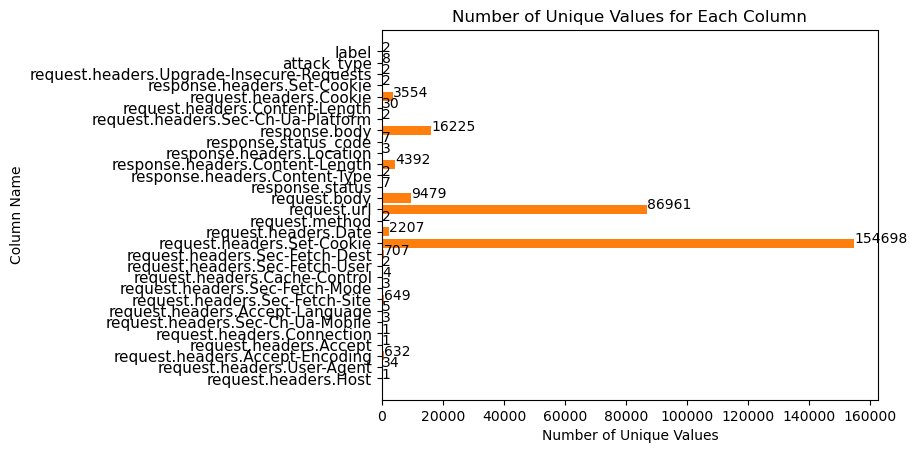

In [3]:
column_names = df.columns
num_unique_values = []

# Loop through the column names and get the number of unique values for each column
for column in column_names:
  num_unique_values.append(len(Counter(df[column])))

plt.yticks(range(len(column_names)), column_names, fontsize=11)

plt.barh(range(len(column_names)), num_unique_values)

for i, v in enumerate(num_unique_values):
    plt.text(v + 0.5, i, str(v), color='black')

plt.barh(range(len(column_names)), num_unique_values)
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Name')
plt.title('Number of Unique Values for Each Column')
plt.show()

## Checking for nan values % in all the columns

In [4]:
for column in df.columns[df.isna().any()].tolist():
    percent_missing = df[column].isnull().sum() / len(df)
    print(f"Percentage of missing values in {column}: {percent_missing:.2%}")

Percentage of missing values in request.headers.Sec-Ch-Ua-Mobile: 11.70%
Percentage of missing values in request.headers.Accept-Language: 11.70%
Percentage of missing values in request.headers.Sec-Fetch-Site: 11.70%
Percentage of missing values in request.headers.Sec-Fetch-Mode: 11.70%
Percentage of missing values in request.headers.Cache-Control: 11.70%
Percentage of missing values in request.headers.Sec-Fetch-User: 11.70%
Percentage of missing values in request.headers.Sec-Fetch-Dest: 11.70%
Percentage of missing values in request.headers.Set-Cookie: 11.70%
Percentage of missing values in request.headers.Date: 11.70%
Percentage of missing values in response.headers.Location: 95.68%
Percentage of missing values in request.headers.Sec-Ch-Ua-Platform: 31.81%
Percentage of missing values in request.headers.Content-Length: 87.32%
Percentage of missing values in request.headers.Cookie: 95.78%
Percentage of missing values in response.headers.Set-Cookie: 97.87%
Percentage of missing values i

## 1 Unique value features
As we can see from the plot above there a number of columns that only have 1 value in all of rows,
which means it doesn't affect the model so we will delete them later.

In [5]:
columns_to_check = ['request.headers.Connection',
                     'request.headers.Accept',
                     'request.headers.Host',]

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: request.headers.Connection, Value: keep-alive, Count: 182767
Column: request.headers.Accept, Value: */*, Count: 182767
Column: request.headers.Host, Value: 127.0.0.1:5000, Count: 182767


## 2 Unique value features

In [6]:
columns_to_check = ['response.headers.Set-Cookie',                
                    'response.headers.Content-Type',
                    'request.method',
                    'request.headers.Sec-Fetch-User',
                    'request.headers.Sec-Ch-Ua-Platform',
                    'request.headers.Upgrade-Insecure-Requests'
                   ]

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: response.headers.Set-Cookie, Value: nan, Count: 178877
Column: response.headers.Set-Cookie, Value: username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/, Count: 3890
Column: response.headers.Content-Type, Value: application/json, Count: 136253
Column: response.headers.Content-Type, Value: text/html; charset=utf-8, Count: 46514
Column: request.method, Value: GET, Count: 159586
Column: request.method, Value: POST, Count: 23181
Column: request.headers.Sec-Fetch-User, Value: ?1, Count: 161378
Column: request.headers.Sec-Fetch-User, Value: nan, Count: 21389
Column: request.headers.Sec-Ch-Ua-Platform, Value: "Windows", Count: 124636
Column: request.headers.Sec-Ch-Ua-Platform, Value: nan, Count: 58131
Column: request.headers.Upgrade-Insecure-Requests, Value: nan, Count: 181408
Column: request.headers.Upgrade-Insecure-Requests, Value: 1, Count: 1359


## response.headers.Set-Cookie

In [7]:
df_filtered = df.loc[df['response.headers.Set-Cookie'] == 'username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 3890})

## response.headers.Content-Type

In [8]:
df_filtered = df.loc[df['response.headers.Content-Type'] == 'application/json']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 117622, 'Malware': 18631})

In [9]:
df_filtered = df.loc[df['response.headers.Content-Type'] == 'text/html; charset=utf-8']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 20705, 'Benign': 25809})

## request.method

In [10]:
df_filtered = df.loc[df['request.method'] == 'POST']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 19291, 'Malware': 3890})

## request.headers.Sec-Fetch-User

In [11]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-User'] == '?1']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 39336, 'Benign': 122042})

## request.headers.Sec-Ch-Ua-Platform

In [12]:
df_filtered = df.loc[df['request.headers.Sec-Ch-Ua-Platform'] == '"Windows"']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 122042, 'Malware': 2594})

## request.headers.Upgrade-Insecure-Requests

In [13]:
df_filtered = df.loc[df['request.headers.Upgrade-Insecure-Requests'] == '1']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1359})

## request.headers.Sec-Fetch-Mode
### 3 Unique value features

In [14]:
df['request.headers.Sec-Fetch-Mode'] = df['request.headers.Sec-Fetch-Mode'].fillna('none')
counter = Counter(df['request.headers.Sec-Fetch-Mode'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Sec-Fetch-Mode'] == str(value)]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: websocket, Label: Benign, Count: 61397
Value: websocket, Label: Malware, Count: 19756
Value: same-origin, Label: Benign, Count: 60645
Value: same-origin, Label: Malware, Count: 19580
Value: none, Label: Benign, Count: 21389


## request.headers.Sec-Ch-Ua-Mobile

In [15]:
df['request.headers.Sec-Ch-Ua-Mobile'] = df['request.headers.Sec-Ch-Ua-Mobile'].fillna('none')
counter = Counter(df['request.headers.Sec-Ch-Ua-Mobile'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Sec-Ch-Ua-Mobile'] == str(value)]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: ?1, Label: Benign, Count: 61221
Value: ?1, Label: Malware, Count: 19708
Value: ?0, Label: Benign, Count: 60821
Value: ?0, Label: Malware, Count: 19628
Value: none, Label: Benign, Count: 21389


## response.headers.Location

In [16]:
df['response.headers.Location'] = df['response.headers.Location'].fillna('none')
counter = Counter(df['response.headers.Location'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 174876
Value: /forum, Count: 4001
Value: /cookielogin, Count: 3890


In [17]:
df_filtered = df.loc[df['response.headers.Location'] == '/cookielogin']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 3890})

In [18]:
df_filtered = df.loc[df['response.headers.Location'] == '/forum']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 4001})

## response.status and response.status_code
In those two features it seems that they both contain the same data.

We will check that and delete one of the features in case they are both identical.

In [19]:
print("response.status")
counter1 = Counter(df['response.status'])
for value, count in counter1.most_common():
      print(f"Value: {value}, Count: {count}")
print()
print("response.status_code")
counter2 = Counter(df['response.status_code'])
for value, count in counter2.most_common():
      print(f"Value: {value}, Count: {count}")

response.status
Value: 200 OK, Count: 107300
Value: 404 NOT FOUND, Count: 33280
Value: 401 UNAUTHORIZED, Count: 17871
Value: 400 BAD REQUEST, Count: 10872
Value: 302 FOUND, Count: 7891
Value: 201 CREATED, Count: 5459
Value: 500 INTERNAL SERVER ERROR, Count: 94

response.status_code
Value: 200, Count: 107300
Value: 404, Count: 33280
Value: 401, Count: 17871
Value: 400, Count: 10872
Value: 302, Count: 7891
Value: 201, Count: 5459
Value: 500, Count: 94


In [20]:
# replacing all the values in the response.status column to match the values in the response.status_code column

df['response.status'] = df['response.status'].replace({
  '200 OK': '200',
  '404 NOT FOUND': '404',
  '401 UNAUTHORIZED': '401',
  '400 BAD REQUEST' : '400',
  '302 FOUND' : '302',
  '201 CREATED' : '201',
  '500 INTERNAL SERVER ERROR' : '500'
})

# the response.status_code is int so we will change it to string

df['response.status'] = df['response.status'].astype(int)

# checking if the columns are equal

are_equal = df['response.status'].eq(df['response.status_code']).all()
if are_equal:
  print("The values in 'response.status' are equal to the values in 'response.status_code'.")
else:
  print("The values in 'response.status' are not equal to the values in 'response.status_code'.")


The values in 'response.status' are equal to the values in 'response.status_code'.


In [21]:
counter = Counter(df['response.status_code'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['response.status_code'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: 200, Label: Benign, Count: 85329
Value: 200, Label: Malware, Count: 21971
Value: 404, Label: Benign, Count: 32308
Value: 404, Label: Malware, Count: 972
Value: 401, Label: Benign, Count: 9594
Value: 401, Label: Malware, Count: 8277
Value: 400, Label: Benign, Count: 10672
Value: 400, Label: Malware, Count: 200
Value: 302, Label: Malware, Count: 7891
Value: 201, Label: Benign, Count: 5437
Value: 201, Label: Malware, Count: 22
Value: 500, Label: Benign, Count: 91
Value: 500, Label: Malware, Count: 3


All the traffic that has status code of 302 is labeled as Malware, the rest can be both

## request.body

In [22]:
df['request.body'] = df['request.body'].fillna('none')
counter = Counter(df['request.body'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.body'] == str(value)]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: , Label: Benign, Count: 124140
Value: , Label: Malware, Count: 39336
Value: dxC63lEA5KLdp8jLuYpv, Label: Benign, Count: 8
Value: H7SGYGaty5HpzmDJ9ZFV, Label: Benign, Count: 8
Value: DavidShawzPxGs45LWXO7nx7p2l4R, Label: Benign, Count: 8
Value: OC3vN2172zB0AwlfUT31, Label: Benign, Count: 8
Value: 5yO1vFVh4FetDEDyUz3z, Label: Benign, Count: 8
Value: 0lgjBAbkTZmcP4FdfyJQ, Label: Benign, Count: 8
Value: JamarYeagerpTUIkoau3vRhiG4nrovs, Label: Benign, Count: 8
Value: RebeccaSturgeon04zOo06uexAnmux9031H, Label: Benign, Count: 7
Value: CharlesHarris7BB6XQ9mm0cFXjfXJbd5, Label: Benign, Count: 7
Value: Fj8sPChkk4fkoFyij1ds, Label: Benign, Count: 7
Value: pnoJO6errauAgppUSXaL, Label: Benign, Count: 7
Value: uuhqMRJqxCdwwaShtSzB, Label: Benign, Count: 7
Value: DerickWeatherfordDORoiYtBWtjtshdSsHtf, Label: Benign, Count: 7
Value: CarlosFelixfSUWZZqF8QK1rFosWz1g, Label: Benign, Count: 7
Value: LC9aDAL89056aaYbv3f6, Label: Benign, Count: 7
Value: VGlQzDUtwv28Tp1M3MJN, Label: Benign, Count: 7


Value: TaniaGlenng9S2ZMYyLAh2JrfloZCq, Label: Benign, Count: 5
Value: Nvy0NeGfoUILdI4LwKYa, Label: Benign, Count: 5
Value: HenryRobinsonOUs3McxepAvQs9aeKQWS, Label: Benign, Count: 5
Value: GuillermoHernandezRfJFXktSNyE5QommrRWU, Label: Benign, Count: 5
Value: HarveyAlfordlKUubaihdvnPGsfuxV79, Label: Benign, Count: 5
Value: 2bDehR76U1FVH7rkUAKy, Label: Benign, Count: 5
Value: fvgIpxrQjqnGAZ30dtFI, Label: Benign, Count: 5
Value: LouiseMoriartyg8EkrluhijwJMl7jXSCQ, Label: Benign, Count: 5
Value: IV7BXGXVuipL8xt4srJK, Label: Benign, Count: 5
Value: gC1ZIMY3u4TgNFFPmg77, Label: Benign, Count: 5
Value: lGSr7tmzhGkV7PwkfrDT, Label: Benign, Count: 5
Value: esHkU5wa61W0In2ulMMp, Label: Benign, Count: 5
Value: TobyChurchillYh7uxkIcn1zt6KGIA5Df, Label: Benign, Count: 5
Value: RichardBlackOJi9E5td4bAjnGLeoWrf, Label: Benign, Count: 5
Value: GayleBoonemoWZRTFuDV9zlwLalM4X, Label: Benign, Count: 5
Value: SusanJohnson, Label: Benign, Count: 5
Value: DonaldHolmesSLcddrfzJ1hcnarOFMKH, Label: Benign, Co

Value: CVhsLC45Mp6GZZEnHcbE, Label: Benign, Count: 5
Value: RobertAshepu7laLBoazWQfGOyYwuv, Label: Benign, Count: 5
Value: cwDI0JMaaScHHdK5Ioti, Label: Benign, Count: 5
Value: LucilleCampbelljeAy3zulZbLjYtjOFLvf, Label: Benign, Count: 5
Value: AngelaVarian2z9ij3tKeoUjbvpioykQ, Label: Benign, Count: 5
Value: p9HCZ11uhUEhx6uQtxD4, Label: Benign, Count: 5
Value: 4i3PBNepGmlFE91Pqo8e, Label: Benign, Count: 5
Value: Wc3jctlccXMfjSb9AaNi, Label: Benign, Count: 5
Value: WilliamDaglewy9GjsCM03bOIkg3gvtO, Label: Benign, Count: 5
Value: vis3zqSXi0uVHMdr30Rs, Label: Benign, Count: 5
Value: LorraineWilliams4u774njJeahV2iHaSwXH, Label: Benign, Count: 5
Value: 6FQjoXUmpKCKVYJJEjHp, Label: Benign, Count: 5
Value: cqF1WTRqNzNxFCVvrrWe, Label: Benign, Count: 5
Value: TeresaSwenson91XnoOnuyEBPD1MgMOHa, Label: Benign, Count: 5
Value: ECuPriDu0qgStvvfUFoM, Label: Benign, Count: 5
Value: EdwardEgge, Label: Benign, Count: 5
Value: SammyCaldwelltBtP1hHKKujzOa2RtHcO, Label: Benign, Count: 5
Value: MathewWatso

Value: p5ZMzuD6V6CFL1IpyT1K, Label: Benign, Count: 4
Value: DelorisKingDejhsnhCuYePUgHAE5Iq, Label: Benign, Count: 4
Value: 8eqF1WeWQ4R4JLzjn5Sd, Label: Benign, Count: 4
Value: FrancesTalley5ON5fQghae6IBD7wRVTX, Label: Benign, Count: 4
Value: l5GJ3UyxOPmrzD7wpFKf, Label: Benign, Count: 4
Value: UuKGDmE74Paux3ULYXVd, Label: Benign, Count: 4
Value: utUcjbP6FBXs0Wz3J2xt, Label: Benign, Count: 4
Value: LonnieReynoldsuUtaElfhEE2XBFLYnuc6, Label: Benign, Count: 4
Value: XsrVW79FwXOvUpk3nHE4, Label: Benign, Count: 4
Value: MarjorieKitanikR3GDaPSOyQrgjt9q3ikb, Label: Benign, Count: 4
Value: VirginiaMcclimoniAcTrVt2CZnVv7Jt9u5D, Label: Benign, Count: 4
Value: AlbertSalcedoy4frIAENzBA8iiMMjNfZ, Label: Benign, Count: 4
Value: JNXD1DyFnKR9h2njnun2, Label: Benign, Count: 4
Value: xtWYJzHoVNfM8MtxHNZ8, Label: Benign, Count: 4
Value: TerriFowler7tJ4dUzSwL345GEwu3M4, Label: Benign, Count: 4
Value: oz2eLLxy26FwaR20JeEo, Label: Benign, Count: 4
Value: AngelaHaugen8MjCZv9xo9wD1UHZ85KJ, Label: Benign, Cou

Value: JarrettFletcher4akQ4M4x47ApwqnX4L5w, Label: Benign, Count: 4
Value: dcE07SHONvBB3TCgBmYQ, Label: Benign, Count: 4
Value: MN9WMv81JwgnTlAHDU7q, Label: Benign, Count: 4
Value: fo5wsiGqismR6kwzDbsT, Label: Benign, Count: 4
Value: oTEsNjNSOaI7V5bo28GP, Label: Benign, Count: 4
Value: xNUdAtTCj88UZRiUbwNw, Label: Benign, Count: 4
Value: NormanBraithwaite3bEISlYlbfJLrbS9vAJZ, Label: Benign, Count: 4
Value: G4Cmqve3CyLzm1dKU3lz, Label: Benign, Count: 4
Value: CharlesWoodardIcCuWpOpxhHWT58pfhhG, Label: Benign, Count: 4
Value: MarthaLasterGNil6metXYilUUhypoAC, Label: Benign, Count: 4
Value: yDcviS7kDlj7T6qid8Oi, Label: Benign, Count: 4
Value: NnyuTANF1iK4rv56Sehq, Label: Benign, Count: 4
Value: jtKKaLWaFQuLL8nWkPhc, Label: Benign, Count: 4
Value: tvnT40oVGShxjtRtOtmi, Label: Benign, Count: 4
Value: FrancesBarretteR1LQPqfZz66OHIH4O8R, Label: Benign, Count: 4
Value: bVW2cM44xq1QZnbOBtjv, Label: Benign, Count: 4
Value: CaseyOverturfBb7OdNWy8k2jw0KfsN91, Label: Benign, Count: 4
Value: SandraL

Value: EdTOkN4sKLykqils3uPt, Label: Benign, Count: 4
Value: DavidBannisterOuWkqfjFsmECc24MW6xl, Label: Benign, Count: 4
Value: ElizabethBarber, Label: Benign, Count: 4
Value: u0N15EbqMQfErOUOsv0W, Label: Benign, Count: 4
Value: 3XZGUtfjrqTvBcZ26rOp, Label: Benign, Count: 4
Value: PatriciaMccormickzn2fT9Zl78GThYPt2upV, Label: Benign, Count: 4
Value: 7ykNYUVHueLYqAOSvDvq, Label: Benign, Count: 4
Value: RoqyZqHaFvoq9vYEuJ33, Label: Benign, Count: 4
Value: DG3hKsNZjuHtQ11QJSYz, Label: Benign, Count: 4
Value: l6xUpWx8g94urrpIyiTO, Label: Benign, Count: 4
Value: Hk9OuSbiGh7v3rI4t2YD, Label: Benign, Count: 4
Value: AdamWalkeru1VQhG2INwilUFt1pf8Z, Label: Benign, Count: 4
Value: MiM1bqgxeoD4n2bslZcn, Label: Benign, Count: 4
Value: jEx1GWRhlo6pWtHr0W3R, Label: Benign, Count: 4
Value: MichaelWilliamsALkBROnIMayoa2Nrd7Tj, Label: Benign, Count: 4
Value: OfxZsCXKQcccW640qVVz, Label: Benign, Count: 4
Value: kqY1w0xlTI8UFVdJ9Bew, Label: Benign, Count: 4
Value: JenniferDanielrXkrxqyzxxhvn07BxpBZ, Label

Value: JohnSamuelsonkeqE5zy98gNPumImSbXX, Label: Benign, Count: 4
Value: MelissaHuffyUL3En3FgTxeZTMAt1nD, Label: Benign, Count: 4
Value: j2prEIfhYLUYEUf6JbtC, Label: Benign, Count: 4
Value: yUAef0mAjL0XBnxo50Vn, Label: Benign, Count: 4
Value: ZoeGayden5reMflVMduSIo14P8YO9, Label: Benign, Count: 4
Value: jjRq5Jr8t2rnajNDx7nb, Label: Benign, Count: 4
Value: LinwoodSchull4pFLrCTqiXnSwAWTbgO1, Label: Benign, Count: 4
Value: IxN21n8TbAnt98XdfZvc, Label: Benign, Count: 4
Value: cjXID042Z9pD4feTFHxh, Label: Benign, Count: 4
Value: 5JjmOPeOKOCt3piiVQ9v, Label: Benign, Count: 4
Value: KathleenCheekJoMAvrLGUDTklg2CBx6Z, Label: Benign, Count: 4
Value: S8GupR5Uddvd7yXUrmzA, Label: Benign, Count: 4
Value: DonaldFlorestnGosXxIO8NM6WKeadQq, Label: Benign, Count: 4
Value: cFixhACzGobyfIQKUiDe, Label: Benign, Count: 4
Value: kp1VkL1xtHn7alNNmvUP, Label: Benign, Count: 4
Value: erfsCime0uaBE4z1G8hn, Label: Benign, Count: 4
Value: jPwshtncHvQ7fkhgHykv, Label: Benign, Count: 4
Value: MonicaTenebrusoWKKSVX

Value: 2nmA5Z41ZcaWixX1BhLT, Label: Benign, Count: 3
Value: DBOjwAe4kDm4z7tNHwGC, Label: Benign, Count: 3
Value: IvuDIkyCZBnwXP3P3Kgh, Label: Benign, Count: 3
Value: UmZcsWDEBol1TV5mr2Mm, Label: Benign, Count: 3
Value: olF3ryhrfJQ849gaPJtf, Label: Benign, Count: 3
Value: ug7NMelzPf6AxLl4jxq3, Label: Benign, Count: 3
Value: DouglasBallard, Label: Benign, Count: 3
Value: JenniferShortOsDqfhrHZSVedZWVMSv9, Label: Benign, Count: 3
Value: VerdaRickard5lgFX7bQeZl4m4aLMbHI, Label: Benign, Count: 3
Value: HermanShull5jsBwr6DXErLNuLD7LHW, Label: Benign, Count: 3
Value: JoanneMooreze2nNrcVPAdBPzVOLjho, Label: Benign, Count: 3
Value: BernardGomezOv3IYabM6yiwSjYndJNR, Label: Benign, Count: 3
Value: omkMDM2AxaJtxUW7kgnR, Label: Benign, Count: 3
Value: TlpN74z6IAY88lo6oxPk, Label: Benign, Count: 3
Value: BarbaraSmith7S2a04t1QhLJt1KaNak9, Label: Benign, Count: 3
Value: 5S2UdIYyKW7SR38kA2XJ, Label: Benign, Count: 3
Value: JustinWellsbrC78vkJAecBY8L9Nh5r, Label: Benign, Count: 3
Value: OE1qrAZHLEqlgIts

Value: WilliamThaniel0YyMdaMuaDN9MTI0Eeqv, Label: Benign, Count: 3
Value: IreneHensleybIO7DTn6mKEBNjmjzSpR, Label: Benign, Count: 3
Value: JoanFrederickKWUasFv2LyX7dJlRLTFR, Label: Benign, Count: 3
Value: Ba4zVVndnttjQRLspJDU, Label: Benign, Count: 3
Value: EvE9CDyhtIIQQmmc6pav, Label: Benign, Count: 3
Value: PerryGreenyGueQXE1D8b80KH4ta8B, Label: Benign, Count: 3
Value: StephanieValdez5OpqU8wa5KZ2W0zQFDvY, Label: Benign, Count: 3
Value: f6RWdUNWdzp2Popa50Dd, Label: Benign, Count: 3
Value: PrpkUCQCEM2RGQYnEjlx, Label: Benign, Count: 3
Value: MichaelBenigno0TpusRCZFMhcM7ovVlKS, Label: Benign, Count: 3
Value: TR0VRsfxxZWhREhg03yn, Label: Benign, Count: 3
Value: RuthJohnson4LSx8MhlSQMka5rExHpr, Label: Benign, Count: 3
Value: SeanSommers, Label: Benign, Count: 3
Value: GwendolynMathewsTtbIJrq5Z0BOomfj4Q4u, Label: Benign, Count: 3
Value: F7O6Io3GZeVNFz7FaztQ, Label: Benign, Count: 3
Value: JoeBonatoke3oLhuwLeHsuf0oivQH, Label: Benign, Count: 3
Value: SeanTuckerlA0zo97rnnaOlBvbjh4j, Label: B

Value: mnRpJRrkf4hX2HPxuYwJ, Label: Benign, Count: 3
Value: EAThcxBuWRUH0UMwMS5T, Label: Benign, Count: 3
Value: MeizlQOrODlLP9GwzJ6M, Label: Benign, Count: 3
Value: JkWNcsizYwK1rIpCG97d, Label: Benign, Count: 3
Value: JaneHaney4i4ti6oUUEmc4S2iZL10, Label: Benign, Count: 3
Value: JamesShropshireF52e6bSWgAuutvvudm5z, Label: Benign, Count: 3
Value: txNUWOMVNfXRYbuLu8ai, Label: Benign, Count: 3
Value: jiUgcu77xRci0BITiRtU, Label: Benign, Count: 3
Value: JamesSabolSJ6OOTcv7D8bdMLCVILo, Label: Benign, Count: 3
Value: JosephJones, Label: Benign, Count: 3
Value: RoderickBauer3iRGsdWq1AS3esXbSLBS, Label: Benign, Count: 3
Value: WilburFleekakCSxLfrEDFQArOPnq2I, Label: Benign, Count: 3
Value: AmandaWalshvT7NAiB22SMMZKO6g9Fr, Label: Benign, Count: 3
Value: ChristopherFreemanJeXP045flSSDPx1AACiv, Label: Benign, Count: 3
Value: EmilyMorrisAmMdunBS01SpS9v7ybq3, Label: Benign, Count: 3
Value: LCvVkftyCXinOUi0ddEG, Label: Benign, Count: 3
Value: PeterYatespIMCExJSK0dpDQuSPLrf, Label: Benign, Count: 3


Value: KennyHudley, Label: Benign, Count: 3
Value: ow6DUprihzPqC6bHVKYy, Label: Benign, Count: 3
Value: M2wQpsfwpbFIHiUxP9p6, Label: Benign, Count: 3
Value: JackHaaseEIVOR1bnCmqEhzxN3CRl, Label: Benign, Count: 3
Value: MichaelGehlC55qm2gFENC381bhnPuZ, Label: Benign, Count: 3
Value: MWusSHOcXkgE3WvZBlFS, Label: Benign, Count: 3
Value: DAC11SOuv6L5rJDnHqqZ, Label: Benign, Count: 3
Value: LynetteHibbs, Label: Benign, Count: 3
Value: JudithHaldemanJ89BzgIXV7k3E5Bkq9OF, Label: Benign, Count: 3
Value: CharlesWright1lHGhAk8LX82djg46RAi, Label: Benign, Count: 3
Value: tZoauJcjvKxTDw6lFYe6, Label: Benign, Count: 3
Value: 9OYrobJWbCYBmRNcJ1IR, Label: Benign, Count: 3
Value: 70lBVg4EwOmtzaVtNk4Y, Label: Benign, Count: 3
Value: x7W4vuUqRiM756SFXLaL, Label: Benign, Count: 3
Value: YnZgD1JF8OhTnsRczdG8, Label: Benign, Count: 3
Value: hoIpCGGz5LN2RJdCdJ5K, Label: Benign, Count: 3
Value: JosephineSeamanoTcjtWiCm3iRybzybqwa, Label: Benign, Count: 3
Value: NellieBolenders9J0MkiSUcdYlhumBdVT, Label: Beni

Value: KarenWheeleriEu5n98qIPUeMd2vqT1x, Label: Benign, Count: 3
Value: 86WhwakVvArIWgogPW4l, Label: Benign, Count: 3
Value: NormanOliver0gf0CiiUyDSuHowmN6l6, Label: Benign, Count: 3
Value: fOLBAGL7aHv7Nl9M3A4u, Label: Benign, Count: 3
Value: ConnieFinleyzees1g2blh3H6eUpCP2V, Label: Benign, Count: 3
Value: 7of04OUOKli2QsE1KtxA, Label: Benign, Count: 3
Value: i8omf7QCQXlqwaCDYHRU, Label: Benign, Count: 3
Value: j1XxmfOs9YNH5d6RLMgt, Label: Benign, Count: 3
Value: 5J4oxNFR0TwQ1q3Vt3Xb, Label: Benign, Count: 3
Value: TerryMartinezgMCt8cAw9g53hn4GJyHb, Label: Benign, Count: 3
Value: 6WrdpjttshvyPY9XZJHc, Label: Benign, Count: 3
Value: l9gL2BcL4MYiQHI4BquR, Label: Benign, Count: 3
Value: m6vwn93mxE6geNjXOoG0, Label: Benign, Count: 3
Value: KennethTovarilBAlsTiFEx2VW6f9Im4, Label: Benign, Count: 3
Value: kupQjZsKn6WIiY5Z0em9, Label: Benign, Count: 3
Value: StevenRocha9uFmJEtjPLkJMzTxypDV, Label: Benign, Count: 3
Value: DianaVidal2Hh1ALKjnmpaUh4xBfER, Label: Benign, Count: 3
Value: B6cBTr5QN4

Value: iw59HrQMrIcRVVjk6B4S, Label: Benign, Count: 3
Value: DamonClay, Label: Benign, Count: 3
Value: 0jcv2TyrKvkkFdN47OPU, Label: Benign, Count: 3
Value: ZrO6l5ubvP5t20HNopdK, Label: Benign, Count: 3
Value: RobertEllisKdEcR3plhgNpCvqJvRYT, Label: Benign, Count: 3
Value: zCjAt5oQWcngW36FXqpV, Label: Benign, Count: 3
Value: KrFfBEcaP2ucRpUBRMtg, Label: Benign, Count: 3
Value: JeanWashingtonUCKAHBAorgE9kDKgwY58, Label: Benign, Count: 3
Value: AllisonRaya698WO5I4IRvBajvJUy7, Label: Benign, Count: 3
Value: QNBk9BNJFGOGnmj3yAMN, Label: Benign, Count: 3
Value: RobertBettermanZock3p9yOWdPpNJ8IFVu, Label: Benign, Count: 3
Value: nHa0g1aU5wQ2vZyz9Vew, Label: Benign, Count: 3
Value: 3N6CotUuIlcb2DJzhNkA, Label: Benign, Count: 3
Value: AnaBrooksu1Kf2A14nZ9ILHW85tqQ, Label: Benign, Count: 3
Value: 0uMNYsJyFxK6WnhtfExi, Label: Benign, Count: 3
Value: iHPRR3SdT9aJdnwEEP9d, Label: Benign, Count: 3
Value: kzj1S746lI8ZgEul25wY, Label: Benign, Count: 3
Value: JoseMason7HNgBvsnImg1YbJGZlMB, Label: Benign

Value: zL7HHLpqXJbJuWMJLo9D, Label: Benign, Count: 3
Value: E6OnNqBSgrhEphUKrJoE, Label: Benign, Count: 3
Value: IrenaSantiagoOJ3fvh2Po1srytrUfjIp, Label: Benign, Count: 3
Value: jAXd4ZdrwQoeTOq6r8rI, Label: Benign, Count: 3
Value: NjDYbISaeAIoXV7sTXSf, Label: Benign, Count: 3
Value: WilliamRamirezyevI80aSBbD5OpgMkqD6, Label: Benign, Count: 3
Value: A4r3SUgLmSv4m07P9hhA, Label: Benign, Count: 3
Value: GeorgiaEvenerQcE8eFWfPGdwcRUUb0yK, Label: Benign, Count: 3
Value: WZbfWibNPgt3q8vstLaA, Label: Benign, Count: 3
Value: 9enjKpedLThTHQqypOfq, Label: Benign, Count: 3
Value: DawnDixongsBEMGQgq3frCNRSh3Vw, Label: Benign, Count: 3
Value: 6fUbCQr8E3x5FApDowIS, Label: Benign, Count: 3
Value: yw0Ou0T7sVDLdI05KzCK, Label: Benign, Count: 3
Value: LindaMoerskRvd0DQ9pf7Bznf5dIni, Label: Benign, Count: 3
Value: IWBhSh19eaXFGdPeCVfX, Label: Benign, Count: 3
Value: DavidKnepperLg3zBD4ELWMb61I9hkJV, Label: Benign, Count: 3
Value: 6jZNyBT4q8CHCcPY0CYg, Label: Benign, Count: 3
Value: ElizabethLuxt1YdLX9bp

Value: SantosBrown08gbAiRQNhoISiRDqtxW, Label: Benign, Count: 3
Value: ZaidaWormleyhqYXsMXVr9JSSaK3nZCo, Label: Benign, Count: 3
Value: 1wtxXQ9gQYrdrfKi4yhy, Label: Benign, Count: 3
Value: MarjorieMoreytSIWsK7aifvu11V5yNjj, Label: Benign, Count: 3
Value: OYNzML82hIm9N9zIXixF, Label: Benign, Count: 3
Value: wvGMygt9vYVfctBCZYmd, Label: Benign, Count: 3
Value: smR0gXQi3fmzgZbHHeqH, Label: Benign, Count: 3
Value: MatthewOwen1cX1mGxNbvRX8sNlLS59, Label: Benign, Count: 3
Value: ShirleyJackson, Label: Benign, Count: 3
Value: V6kW7ihBAKjt0BS212hx, Label: Benign, Count: 3
Value: EuCz6wI7DVsv636VuOcc, Label: Benign, Count: 3
Value: DFBDOjwJtEY8y1LCEBuX, Label: Benign, Count: 3
Value: SandraDavisZQ2plRpyF0pzidcTCyQX, Label: Benign, Count: 3
Value: 9rV9HvcSeAg9bbQANhNd, Label: Benign, Count: 3
Value: BerthaLonghq7ogbV4JIXLLo9STrCa, Label: Benign, Count: 3
Value: MarieBlairiHnyYazbCN34Pl24jmcN, Label: Benign, Count: 3
Value: PaulHarveyvkGZ3MWw2yRPBWACxDNo, Label: Benign, Count: 3
Value: KarenRossf

Value: BrianStoverHxnAVEZ3g7pk4WcLN3fo, Label: Benign, Count: 3
Value: YL8a8x4piDAPLDeWUPAJ, Label: Benign, Count: 3
Value: srDYcdMeYrbQtsXS5neK, Label: Benign, Count: 3
Value: c6gEyU5rb0VlrpeH9h6S, Label: Benign, Count: 3
Value: HibV4ejtN43KlH5G2mwD, Label: Benign, Count: 3
Value: O3RIjVPWd18b7xVc8gfQ, Label: Benign, Count: 3
Value: LulaWeissWH0kgHwW2jIAIHcaKaCj, Label: Benign, Count: 3
Value: RicardoHawthornegn2JCUnAtog9bXDrTq0t, Label: Benign, Count: 3
Value: ChristinaBarcooyAck8aocrYmfAfWcvEO, Label: Benign, Count: 3
Value: WalterRouseMMf9FOl0EW2xQCizf0Yn, Label: Benign, Count: 3
Value: PauletteMcalpineY7pTSXZhjy6ey0eAWRFs, Label: Benign, Count: 3
Value: GraceKerrkscjDmLSLf4sB76660bS, Label: Benign, Count: 3
Value: Cr4eXLUJFOiCwsp321bc, Label: Benign, Count: 3
Value: 53eD41UZv5vfu00P42DK, Label: Benign, Count: 3
Value: AmyLowryjtfQuQhNflxIa7NYt4Up, Label: Benign, Count: 3
Value: ScottEatonV0cerkgAOR0eGqWpE7ZK, Label: Benign, Count: 3
Value: SaraWilliamscoZlPjRobC8UENzwlYVB, Label: 

Value: tW9dXvXeHfc6A5iT5T1r, Label: Benign, Count: 3
Value: ShellyGiannettimdZxr4STFnqv1mP3uGqx, Label: Benign, Count: 3
Value: MatthewBaldwinTGBtYeeL2CMPdhTeMYTo, Label: Benign, Count: 3
Value: JanisWallaceNPowYEjfoRJ0LEOhTJKp, Label: Benign, Count: 3
Value: g6d6H1sbPqv9WKn9v8F9, Label: Benign, Count: 3
Value: JerryAskewj4idfKzADQGOAKI2fEqw, Label: Benign, Count: 3
Value: ThomasBeckgyf8BR3f01eV0U0mzU1F, Label: Benign, Count: 3
Value: PPetzMBsdH1HErxKbeBU, Label: Benign, Count: 3
Value: AdrienneVathHu8bzIUiBxNvwSt0n4xr, Label: Benign, Count: 3
Value: pUCHUEzu5Tu7oI2VZgsy, Label: Benign, Count: 3
Value: TfbbpanCG1G9jjn5zvqg, Label: Benign, Count: 3
Value: gFPrzn6NkBo1N9m12xCO, Label: Benign, Count: 3
Value: UhXmTsXplMHiEkdSVDVb, Label: Benign, Count: 3
Value: EricDenniet4w9BS7astVHWerR8kqW, Label: Benign, Count: 3
Value: wXbDHrOedKXYguusyn7v, Label: Benign, Count: 3
Value: DonnaMiddaughrIoVaYZ7NHQlNBYUJC3m, Label: Benign, Count: 3
Value: ElizabethHeadleyPzvY4dppx9b4GfcPg44n, Label: Beni

Value: BrianBarretoBanWKzu9a7uIunjG8O6A, Label: Benign, Count: 3
Value: ctt3EL9fJRJKF91Ra3bs, Label: Benign, Count: 3
Value: MatthewTuckTNXMoz81n7lVbtqyKnJJ, Label: Benign, Count: 3
Value: WRODxiF2s5TQtN5yAxBM, Label: Benign, Count: 3
Value: WilliamWendtO0aTysPvKcazIw6AoHve, Label: Benign, Count: 3
Value: ChristianAtwellSsthJAAG6rLxXNTY6sdE, Label: Benign, Count: 3
Value: JamesWhalenmVbrJ20CmK3mmDHCLS9F, Label: Benign, Count: 3
Value: 8NFDrYhFWYRgZ5kC9CpV, Label: Benign, Count: 3
Value: MichaelTomlinsonbO4MHUXo7bsZferzI5Om, Label: Benign, Count: 3
Value: 6LdSm6849Diz7tzy53Wg, Label: Benign, Count: 3
Value: DouglasMason, Label: Benign, Count: 3
Value: AlanKeena, Label: Benign, Count: 3
Value: d9GnKC7fBg1HyEq6QSV5, Label: Benign, Count: 3
Value: B2AW4GhKwOcQfn1LWVKL, Label: Benign, Count: 3
Value: JslP6gnNJVJdFnBI2DVz, Label: Benign, Count: 2
Value: obwR0pe56jgfGCnIcf3m, Label: Benign, Count: 2
Value: BrendaMorgan, Label: Benign, Count: 2
Value: JxFddGjITj6OilmZhuuy, Label: Benign, Count

Value: EdwardMorrisyn8dKBUc4TDs1xbMWdjX, Label: Benign, Count: 2
Value: AnitaBurgosSyLHbFNQZRjW6GVeSlp9, Label: Benign, Count: 2
Value: MarianaSchellhQAtsIFQMgEgkgafpaN2, Label: Benign, Count: 2
Value: 1KEZOtJUQfyVt29cbhmh, Label: Benign, Count: 2
Value: OZmIPlUsNK4GHNet26yG, Label: Benign, Count: 2
Value: eGp4Oyc0dewMjKD82Z5f, Label: Benign, Count: 2
Value: EmmaGrubern92bLLmO7npyxQidqrdi, Label: Benign, Count: 2
Value: AnastasiaHester3sH6F0vKslZspWuTxiNg, Label: Benign, Count: 2
Value: DawnPavlick, Label: Benign, Count: 2
Value: CathrineHidalgosgST9Tno18JignbHGFpU, Label: Benign, Count: 2
Value: EPLo0HUXsLs4Pi5Mu3Xw, Label: Benign, Count: 2
Value: RebeccaEdwardsdskQirW8KTRFIsxKSDrK, Label: Benign, Count: 2
Value: PEByaEtf7vFFylg8Vc9H, Label: Benign, Count: 2
Value: EdwardRamirezvru243eEvV0LZmFnsvZa, Label: Benign, Count: 2
Value: JohnMillerfo56E0mhC4OYf3aV9Owv, Label: Benign, Count: 2
Value: PamelaMillereYigkxEoxSBPLrTKS2Ak, Label: Benign, Count: 2
Value: nnMrowmkus2krZrEDRP9, Label: 

Value: QWJmSbXxBZLhgYuBPtIw, Label: Benign, Count: 2
Value: h6rxh763BrcvcdodY75t, Label: Benign, Count: 2
Value: HMWIZpvHsMDvkCYkP8Y0, Label: Benign, Count: 2
Value: 0nhrgfyMOlfAEbctAheI, Label: Benign, Count: 2
Value: NikiLuebkenReU1rrRdBUkjsdPqXQT, Label: Benign, Count: 2
Value: Gxd2da8DVOZWrHLHmtOx, Label: Benign, Count: 2
Value: GeneFlintJV1LCdeGCn10T6Pkh6xb, Label: Benign, Count: 2
Value: MercedesHolcombL603SJnk3oNMQbcaG6MU, Label: Benign, Count: 2
Value: JulieLeonTaD3Uv8dvTqfP5MVebtZ, Label: Benign, Count: 2
Value: d22ZsBNKYLpDlxJkCLIP, Label: Benign, Count: 2
Value: TuYLZIrNbMkPNKfDaz7o, Label: Benign, Count: 2
Value: PearlLipfordJDWvYXnEKVb8Aw8sTvXq, Label: Benign, Count: 2
Value: BXun9tTGuhvdRC430YWb, Label: Benign, Count: 2
Value: F7ng67zAcpfIVOpshq9s, Label: Benign, Count: 2
Value: ShirleyBattlexpIYp0P84YYWtfKHiVhB, Label: Benign, Count: 2
Value: dZr86Ch6EVzxh2cRrHll, Label: Benign, Count: 2
Value: noM8RNLxzTl5Qrp0I2iS, Label: Benign, Count: 2
Value: lW6KWbLV3pb7KLPpkAYx, La

Value: 8RZiVE2PRJSMUlrsZukL, Label: Benign, Count: 2
Value: WilliamKearneyANxzv73Q3koeppB5s5cq, Label: Benign, Count: 2
Value: CQNqx1dCXsN5wDTDwDRZ, Label: Benign, Count: 2
Value: MatthewMilesbrslYvWwbKCqT3XR1sAA, Label: Benign, Count: 2
Value: PlpJXkl6RQuJM9VEz2Ei, Label: Benign, Count: 2
Value: ErnestWatsonTIxUsmPQbPSqK9zsy3Oi, Label: Benign, Count: 2
Value: jyJuYftmoq8wUq6AmkkT, Label: Benign, Count: 2
Value: 1MaA1YdSJwqBLfi1PLgO, Label: Benign, Count: 2
Value: DerekGuyetteKEGNSYP5tvn7Z6ODf0cG, Label: Benign, Count: 2
Value: WilliamDiaz9vDisFrTSLEeCFxShatV, Label: Benign, Count: 2
Value: BettyRagsdale, Label: Benign, Count: 2
Value: I3nli1qFAokLfWY4trhV, Label: Benign, Count: 2
Value: QAltQCEjkAGp9lD9lGkV, Label: Benign, Count: 2
Value: AlexisBeltran4MovFtuxSJt41jHKgRug, Label: Benign, Count: 2
Value: PatriciaMccullough53MHMRKxBdpoUczdCRWd, Label: Benign, Count: 2
Value: EthelThomasVsbn5OIAI0zmzvA4626n, Label: Benign, Count: 2
Value: fiDRf8OGIOh4gANvF10n, Label: Benign, Count: 2
Val

Value: 283bRNqLeM6dlvVTYXCl, Label: Benign, Count: 2
Value: Q9bAveSf2yMTzqQgFRU3, Label: Benign, Count: 2
Value: iDvEqK41NAbeW5jFdpzS, Label: Benign, Count: 2
Value: zqDVAHu92Mh9ElK4UjFn, Label: Benign, Count: 2
Value: DonaldPainter, Label: Benign, Count: 2
Value: 8AphB5EdqZMOXnTaf0lV, Label: Benign, Count: 2
Value: icH3J6CBS4ZbSbvnypSn, Label: Benign, Count: 2
Value: EmilyJordanJajVGEfdmizOy95KWukl, Label: Benign, Count: 2
Value: VeraHolmes4yMXnaf5DNEnaZkTfweB, Label: Benign, Count: 2
Value: fRu6HrQXdsCXGeKzQ4ZJ, Label: Benign, Count: 2
Value: Hvr6a6MnNlIs6Mlb14C7, Label: Benign, Count: 2
Value: OHkeMQo3u9hRnodPMTJP, Label: Benign, Count: 2
Value: TawnyaThompsonvlJ3yTeXA6ZQxgm2qL88, Label: Benign, Count: 2
Value: yAffqaMLQcSFY2mMbcBn, Label: Benign, Count: 2
Value: bIFuZ5hwmLNatOO6jLJt, Label: Benign, Count: 2
Value: crEaDsAazQPptp67yyBI, Label: Benign, Count: 2
Value: 7JZrE7YYyfSvagm3jnt1, Label: Benign, Count: 2
Value: Frwdvhc04fopL3dVslcR, Label: Benign, Count: 2
Value: 6dmqcGI4fcW

Value: fOwlxeIv93Rry2RrkQpV, Label: Benign, Count: 2
Value: I7FTOyngozcul2csic7j, Label: Benign, Count: 2
Value: 9mYDCNGCpNvDDkSe4nyM, Label: Benign, Count: 2
Value: KUj09XNJ8p963nMzEIiN, Label: Benign, Count: 2
Value: QUr77Zmc5yZ8zEmNf9WQ, Label: Benign, Count: 2
Value: QEDvgHlesrD8d3aUMuf0, Label: Benign, Count: 2
Value: v4NgUOAA1vVpxDlOnvDJ, Label: Benign, Count: 2
Value: BobThompsonjCx92WNyNeo5W37dE96c, Label: Benign, Count: 2
Value: W9LKtCGO4NcLZMhlQo2x, Label: Benign, Count: 2
Value: CarlTaylorIbOOcIiU4Hc8JGaXyr7r, Label: Benign, Count: 2
Value: LyndaJohnsoneRcMTrjarL6L3sVCd9f5, Label: Benign, Count: 2
Value: StephanieBaileyqxbzeFAM6HIGn8JlnGhB, Label: Benign, Count: 2
Value: 4d4uKaapTpb8FKYLcFYq, Label: Benign, Count: 2
Value: UiRkPtf3JfW2zt5wJIvo, Label: Benign, Count: 2
Value: ZD9yCvIGRGmDyENdTbHQ, Label: Benign, Count: 2
Value: FCoSrnc65nEZFuG7lgSH, Label: Benign, Count: 2
Value: HAyck5GsiEmj87ndZhRC, Label: Benign, Count: 2
Value: PhillipSmudrickr3BP4mQtI8pBqJb1mvBO, Label: 

Value: JosephMeadSPkyrJw8j3MKB5i9jGgx, Label: Benign, Count: 2
Value: CaEoUtbQQJLMzt0gLynw, Label: Benign, Count: 2
Value: vHyvJJeeeGe46xVKSuxy, Label: Benign, Count: 2
Value: UYJGPt39qEz4xcSI3Yq5, Label: Benign, Count: 2
Value: ChristinaBlair5zmcuZKOmOXjnsq2FydU, Label: Benign, Count: 2
Value: JorgeMeyersMIEvcqyIvWgNH63QSQ5, Label: Benign, Count: 2
Value: NUQRuEbjxh4fcQsYPl4U, Label: Benign, Count: 2
Value: 2OXTj4bBXxufbU6IdrTM, Label: Benign, Count: 2
Value: JudyHedrickn3HPhd2zn82kLwwbTMvW, Label: Benign, Count: 2
Value: JoseCarsonpVqjDqgN1E8Dt6JWJEAp, Label: Benign, Count: 2
Value: 5ZvSiIOsKZFcFUxuNind, Label: Benign, Count: 2
Value: BarbaraArnold, Label: Benign, Count: 2
Value: CeceliaOmaraTYmP2a7Zc9gfSjVkFkA0, Label: Benign, Count: 2
Value: mfTZubqEfEe5XDu59MAB, Label: Benign, Count: 2
Value: 0FJE8q098LeTBYmHpnjz, Label: Benign, Count: 2
Value: DxeOLEYTswZd3tzNWFfZ, Label: Benign, Count: 2
Value: coGa9jE5ClOhi4vmnOpX, Label: Benign, Count: 2
Value: OBxRc0LVKOjy4TdA1Uoy, Label: Ben

Value: omCmUbBfCI11qQGLUTx4, Label: Benign, Count: 2
Value: GracielaMoralez7orB6zXNv3lBkk4crkp1, Label: Benign, Count: 2
Value: EttaMathisonJ1D7chw2904r4IEYU0NE, Label: Benign, Count: 2
Value: AmyHornereqofgRu8nA7OHsNAafT1, Label: Benign, Count: 2
Value: KathrynMyersTHUODaR5kT0VSggYUzD2, Label: Benign, Count: 2
Value: f2m0IAFHgg7oFSu47lD4, Label: Benign, Count: 2
Value: RobertOwensHIDaZN0SRr82Fyg7El3R, Label: Benign, Count: 2
Value: AnnaVansantbYuCCGmHLStt4UDkaY2b, Label: Benign, Count: 2
Value: JoelWilson7QKlys5GUD5hiQndI4b8, Label: Benign, Count: 2
Value: L8ffFvvPEpC88PQKUNZs, Label: Benign, Count: 2
Value: CecilDemaraiscn02moVUCpBiPIMIqe3U, Label: Benign, Count: 2
Value: 78PKstQdJknB4yw7E8dp, Label: Benign, Count: 2
Value: whGDIkDsf00GTjQFJWRE, Label: Benign, Count: 2
Value: LarryAhrens2Iq3oForyBPowsoQySAz, Label: Benign, Count: 2
Value: CynthiaSimcjfbNcUtehosDyS0AaAe, Label: Benign, Count: 2
Value: JdniiaL3VKqP7mps3V3o, Label: Benign, Count: 2
Value: CharleneArdodXHayLUfsCMdx5nmBzW

Value: MiltonSexton34V7k4bmNyyMSDus285n, Label: Benign, Count: 2
Value: zb9RA6rCp9e6MvwIJhet, Label: Benign, Count: 2
Value: EileenGoldsberryzcTYmZRsc1OeFgUbSkjB, Label: Benign, Count: 2
Value: sdyGBZwk6mYq11DyAfDE, Label: Benign, Count: 2
Value: JosieMayzpqbNbmUc8hq2Nl6K8q4, Label: Benign, Count: 2
Value: RSgUDp5HJwUCVgmbfOFv, Label: Benign, Count: 2
Value: ElsyAlmaJRZ0BxiEAmfrpJU1n7OW, Label: Benign, Count: 2
Value: hmLwquKdu664e6NyfyTY, Label: Benign, Count: 2
Value: PBOyURIW55X4olRQaJhN, Label: Benign, Count: 2
Value: qpa79G8C0exkvEhz2ebZ, Label: Benign, Count: 2
Value: BeverlyFarrNLGl9moZo8CCYt3NrL2Y, Label: Benign, Count: 2
Value: tsCu2901g2RSRgyBwFlP, Label: Benign, Count: 2
Value: V69s8I296R8Ahvqmr1Mh, Label: Benign, Count: 2
Value: AnaSlocumJZ4SkcLHikPCzN1Zg1Vw, Label: Benign, Count: 2
Value: JamesHammondsbR8pJTLG9AOltzCWQEe7, Label: Benign, Count: 2
Value: AugustaBoydd62tL9jOMAdY8bMxgS3l, Label: Benign, Count: 2
Value: GlennJurasekfSjaL9r2jAQCutfe3q2J, Label: Benign, Count: 2

Value: RodneyChadbournen1ujctf3GH53vrHcczXL, Label: Benign, Count: 2
Value: AKNf3YNOaTQ3kSlvX6mo, Label: Benign, Count: 2
Value: 6Y4uEIkZtm0BLoreiaqL, Label: Benign, Count: 2
Value: ConnieDavisnQSDcOP3c0uWaI9AAZp0, Label: Benign, Count: 2
Value: MaryRobertsQ4vVHj0tIAPZqPZTjeVq, Label: Benign, Count: 2
Value: HowardJamersonWJXbT7uh3eoCyFc4UejS, Label: Benign, Count: 2
Value: M63rJCR1l2HEkaOW5RNu, Label: Benign, Count: 2
Value: SaraPitts4YlBex5uXyVtXyaAEFbC, Label: Benign, Count: 2
Value: DarrellWrightASs871lEp59SPWqiyojo, Label: Benign, Count: 2
Value: 1llpPvJVTJRDUifZ6DJk, Label: Benign, Count: 2
Value: DianeMusserzWcEimSvWYqMRS6iti4B, Label: Benign, Count: 2
Value: ruWAt9rvwmTH9F8bGAs0, Label: Benign, Count: 2
Value: DlPROkOeWAa1RC89whxk, Label: Benign, Count: 2
Value: qcFBWL7wZItexjtvYmqj, Label: Benign, Count: 2
Value: dnoUlv4R3M6t0Z2w1Yi2, Label: Benign, Count: 2
Value: lLLsZ4RI1ZdoF94QPZkZ, Label: Benign, Count: 2
Value: TheresaFilipiaklxS84sspZiOsztGsv0O3, Label: Benign, Count: 2

Value: DeborahMcdowellQRw6yIK4vyMJq80v8ukI, Label: Benign, Count: 2
Value: DennisWallacef7eAvfcl5broZu5jzs59, Label: Benign, Count: 2
Value: MonicaNoblesg2iL0R9omvgrBlpSYMI3, Label: Benign, Count: 2
Value: iZv3usu259zGsfBGue1Y, Label: Benign, Count: 2
Value: mKIfimO1wOWfXybbkcWb, Label: Benign, Count: 2
Value: lU7nuKUBDAjnkjJcrwKp, Label: Benign, Count: 2
Value: qVOXKL6kv7zCZobaRii8, Label: Benign, Count: 2
Value: 0rUT1dbEf6ZSSAncRpQW, Label: Benign, Count: 2
Value: I1Ru962zGq5xDZK9qiSQ, Label: Benign, Count: 2
Value: uTJ7zoKKHuu9wJKLbcMr, Label: Benign, Count: 2
Value: WiB6nUlqaIU33svJT5dC, Label: Benign, Count: 2
Value: SusanGardnerOmz2ImDF66CEMgjXD5Zu, Label: Benign, Count: 2
Value: WalterFieckKJevwrrKNlYrZ8ihTk2P, Label: Benign, Count: 2
Value: BarbaraLajoieWx5TTzy6Vg3dFs3sxScY, Label: Benign, Count: 2
Value: RonaldAthertonKzWQHXwSrhqxnG5vpsrN, Label: Benign, Count: 2
Value: LesterRichardsK9KNJLK3O4a1VoDmfbfK, Label: Benign, Count: 2
Value: 55hKcUP986GBCKvS4quV, Label: Benign, Coun

Value: KatherineBrownJhMG8HEzpx5GrYirctz1, Label: Benign, Count: 2
Value: 0JEmTxmDcxxM5gX5qjxA, Label: Benign, Count: 2
Value: 9SJSEg3759OKRavGrGn4, Label: Benign, Count: 2
Value: GeorgeWhittmanp4AALPBMoWEAg8yuXiIZ, Label: Benign, Count: 2
Value: LauraHalllp33xtWKWwiZD3869OSZ, Label: Benign, Count: 2
Value: B8V8Oo8O8EB4Kc206YeU, Label: Benign, Count: 2
Value: QgMgwrh7Av5hCO2GG9kj, Label: Benign, Count: 2
Value: CarlEuryy2EKD0SCfrhOtOrdhbpZ, Label: Benign, Count: 2
Value: RigobertoFrazerC5AlBIwJuDUXrdEAOOc7, Label: Benign, Count: 2
Value: ArdenPoole, Label: Benign, Count: 2
Value: 2p4W06sOYImRS9QY6Fac, Label: Benign, Count: 2
Value: TpbECrTAaURVkD5iARor, Label: Benign, Count: 2
Value: OO3XUhmjttllWHJYZg9a, Label: Benign, Count: 2
Value: WilliamHillman, Label: Benign, Count: 2
Value: G3XPTRTWCXWTE8U1D3zk, Label: Benign, Count: 2
Value: MyrnaPecantyCsZH8gtVdI5QTgiHh4yd, Label: Benign, Count: 2
Value: DavidColeoXOZRLKqW7ABA1fbKLFJ, Label: Benign, Count: 2
Value: u3BmapvDkTNByGukPnju, Label

Value: Uv1SHjTXTPbGrdvFc6mG, Label: Benign, Count: 2
Value: 83XM1zfPBhcdWAn8hNFQ, Label: Benign, Count: 2
Value: DelbertTrejodBBdelh444DKCQYTbt4J, Label: Benign, Count: 2
Value: TinaWilsonAttY12A0npoDONqr8Wmz, Label: Benign, Count: 2
Value: JohnMcleodfwRm8VdhAn8aym0oTB5n, Label: Benign, Count: 2
Value: Cb6nkxFHVayX9w6CUtv2, Label: Benign, Count: 2
Value: cs78QUOOM2yoJGql6nqZ, Label: Benign, Count: 2
Value: NancyBristolavHbqwUsMbMXXBSp5JNU, Label: Benign, Count: 2
Value: X6fBjKM4rq10xHkJolPd, Label: Benign, Count: 2
Value: eV4xRXmQ4lSgcHjYLhW0, Label: Benign, Count: 2
Value: ukZm3fjt9B2LAKyQ6WZo, Label: Benign, Count: 2
Value: NancyPruittOovhyUiNxpewYNT3wgiu, Label: Benign, Count: 2
Value: iXQVKXUm2KVnqYj4kgdS, Label: Benign, Count: 2
Value: FNlHfKN1VZLOUVhz6tmB, Label: Benign, Count: 2
Value: 7Wbu84cbCHSA95QzpXf5, Label: Benign, Count: 2
Value: 6w4mx6w1hLxGrP0FAQ9v, Label: Benign, Count: 2
Value: FY5V9asMiC79yG5lBJE8, Label: Benign, Count: 2
Value: FrancesSteinerSe6uUYlUE0yKgr0NgNBH, L

Value: RonLemaster4Um96QMCNkQjiSs3XgC5, Label: Benign, Count: 2
Value: PeNJdTGQBYTMQrHF9yny, Label: Benign, Count: 2
Value: HenryJordan2DqjyfWC7RDe3x6IGPx3, Label: Benign, Count: 2
Value: DanielJohnson8EouFiERJZDHmZqJWV1M, Label: Benign, Count: 2
Value: RobertRogersrcuTOms2u8mECLwQk1y9, Label: Benign, Count: 2
Value: brb3Yfk2TpR3468uTRtA, Label: Benign, Count: 2
Value: JerryGoffbBz5CGwT4yOWY2ziWCJf, Label: Benign, Count: 2
Value: CP1uJFzA3EeQo6n8zMpx, Label: Benign, Count: 2
Value: pfN2s5INxYES6BOgAvNK, Label: Benign, Count: 2
Value: sSYFPQj629wrOuOS9iY6, Label: Benign, Count: 2
Value: nUr3SRDmKYxxcoONyBNl, Label: Benign, Count: 2
Value: RossBegay7vD4we3k5O2vBrSoSvTf, Label: Benign, Count: 2
Value: RobertRegayytFHvS1PAMXp3wQ6Ie1, Label: Benign, Count: 2
Value: PBKASGa054AWa1SQm0RP, Label: Benign, Count: 2
Value: FpebpBqTNoOKuDtF2zXi, Label: Benign, Count: 2
Value: p21bxK6kBvn7vWN1Emem, Label: Benign, Count: 2
Value: 7vyzW46ViYoJxltybJih, Label: Benign, Count: 2
Value: hGCCkduFIBsxD5pNu

Value: Ag9kHNyln7ARzGn3SlmI, Label: Benign, Count: 2
Value: JonThal9kvpcufXXPZCjjN5bzX4, Label: Benign, Count: 2
Value: 0Q6wrtsuqaeMq8cl3lZH, Label: Benign, Count: 2
Value: ej2IBJZbnvKo4rvv5K76, Label: Benign, Count: 2
Value: Eez52jtjUQAHKBjIioQl, Label: Benign, Count: 2
Value: JohnIngles, Label: Benign, Count: 2
Value: SarahBrooks6GYI2iGmf5o33cOT8BDy, Label: Benign, Count: 2
Value: GregoryChallendermA86rsraQBl6OVXePRHI, Label: Benign, Count: 2
Value: OtisHensleySa7MksJ1ndIZwrzDFlgZ, Label: Benign, Count: 2
Value: StephanieFloresAauC12fxutx9t26VF643, Label: Benign, Count: 2
Value: G80f2gZDA9mgSuyButUN, Label: Benign, Count: 2
Value: LowellCondon1T73QR5eBJHoMMwToSZA, Label: Benign, Count: 2
Value: MarySimsIFgk7wTotZrxwwzsNlk7, Label: Benign, Count: 2
Value: PamelaJohnsonVpLc64MZufYpLli93lhf, Label: Benign, Count: 2
Value: zKWqxltnZfJLESG4DGFk, Label: Benign, Count: 2
Value: mfkjgx5MTS2xmA9Ui9HC, Label: Benign, Count: 2
Value: LonnieLopintoGXtRcCd2bC12CJko4bWP, Label: Benign, Count: 2
Va

Value: MardellBealsRKJrXZBwnNqVFmmr5LmD, Label: Benign, Count: 2
Value: pONRcNVqcg4xSmaFojXG, Label: Benign, Count: 2
Value: VivianChristian8Ki7zT1fz1RBNklnGOH0, Label: Benign, Count: 2
Value: CarlosTinavnpbm1FcjUwqLQtvpFLX, Label: Benign, Count: 2
Value: KimOneilxmIQzGRC418osJMUXZ6V, Label: Benign, Count: 2
Value: CamillaDefibaughv55C2wDcbiGe61dMPAFY, Label: Benign, Count: 2
Value: BeckySochadiy99vmTpPgJ20fj1POD, Label: Benign, Count: 2
Value: AnthonyBarbera9UJPXNjkt16rfXq3Xjht, Label: Benign, Count: 2
Value: AmandaCruzLYRWg69rHDiPVVz9U7SI, Label: Benign, Count: 2
Value: PiperAlexanderyZlKJzetCMwQAHGEumei, Label: Benign, Count: 2
Value: 03MFKIL17190iJDJxTeO, Label: Benign, Count: 2
Value: JackBrandjVyLSYn5YnPCYGm6Z7MB, Label: Benign, Count: 2
Value: KathleenJacobsenik2BaE45DnB9jqc5SeTp, Label: Benign, Count: 2
Value: VNStmwlbfJvSVJwda9BX, Label: Benign, Count: 2
Value: ZBMqBmmrqe5CHKCbY198, Label: Benign, Count: 2
Value: WendyBlanchard8YQLuXajfz8rCPiyvs9s, Label: Benign, Count: 2
Valu

Value: cWb2bGsuZwjBYD5HJmvz, Label: Benign, Count: 2
Value: KimCrawfordu1mCdUbIr9u3rmtcWXhk, Label: Benign, Count: 2
Value: StevenDavisgkhGQ84TeTXa5jcTtKCL, Label: Benign, Count: 2
Value: 3wOMq7saL2NqFkztghlW, Label: Benign, Count: 2
Value: W30ODNqU5wOKXNBcU2ce, Label: Benign, Count: 2
Value: kVujnHXRyMtU3Lbdsr6h, Label: Benign, Count: 2
Value: UFzxvROjimQdtjXIlAhM, Label: Benign, Count: 2
Value: HypJvW7VDi4s81mdBfLB, Label: Benign, Count: 2
Value: rZLZebnySFapsAhkSN4q, Label: Benign, Count: 2
Value: EdithBrucculerimAL6EwcwqD3Rd2H1Sojl, Label: Benign, Count: 2
Value: ShanteRiversyhOJYAnmCiMNJknpiGT9, Label: Benign, Count: 2
Value: dJHs2EoLqDogbaJkkIxG, Label: Benign, Count: 2
Value: MargaretBassiZnO9Bl2XshBzVIz8teX, Label: Benign, Count: 2
Value: AprilWillardipKKEjEvbrb5QcSKE5IP, Label: Benign, Count: 2
Value: WesleyFontaine, Label: Benign, Count: 2
Value: BeverlyGoodwinDYXhzYfgNBDensZZVRQ3, Label: Benign, Count: 2
Value: YGZyueYLPJpKK00PXgDk, Label: Benign, Count: 2
Value: DavidDeitzl

Value: JanetHammondTwwShD53Pt8AHVgucRN5, Label: Benign, Count: 2
Value: 4wE8GnhGt8ho9N9jbBBr, Label: Benign, Count: 2
Value: evpyvDuhMISC5VbWTZqk, Label: Benign, Count: 2
Value: BrendaGabriel0mDykAJsCD9mBN9PzRPY, Label: Benign, Count: 2
Value: SandraZirinD9KuGkvBkLJTP5L9TWzm, Label: Benign, Count: 2
Value: MicheleMedeirosv5yf5AFyw71W4KimLPKe, Label: Benign, Count: 2
Value: GovcmOvo4pINNutAdIDD, Label: Benign, Count: 2
Value: hMN4O2Umh8scnkAk6Ueb, Label: Benign, Count: 2
Value: BE54lKMo54w8LPm6Wnuw, Label: Benign, Count: 2
Value: EricThurmanPsjNCJtydu59rya2EQrC, Label: Benign, Count: 2
Value: LindaFarrellq326j5kwiwcPGngN0WHg, Label: Benign, Count: 2
Value: nJwraZ8ODKoAj0NKozT3, Label: Benign, Count: 2
Value: J3opuF8qPxInIRN5Evyx, Label: Benign, Count: 2
Value: F6nYMMOr1qnngE6Tut6a, Label: Benign, Count: 2
Value: DonaldMatsonmq85C9mwgyEieLy59W06, Label: Benign, Count: 2
Value: WH8SejhEfpN2Di5937C5, Label: Benign, Count: 2
Value: ICBJIT5nDuzqRtUZcX6f, Label: Benign, Count: 2
Value: BINohI

Value: ZIdZ4D6wQ1waBY94aFbM, Label: Benign, Count: 2
Value: p7r6j5ayh1JuZe0aO9Nw, Label: Benign, Count: 2
Value: LauraSeniorivp86KCnSJ1onktWbTvC, Label: Benign, Count: 2
Value: TorrieEngle2Iea0spHeBfiFV2zvTcc, Label: Benign, Count: 2
Value: MelissaDeyoeqCXoBJtM3uwvne2asG4k, Label: Benign, Count: 2
Value: LeonardWardFy0fJdHrmwDnLC2sl9ya, Label: Benign, Count: 2
Value: JustinBlakemorex68KZ5Nm1O9gPvkfqnYP, Label: Benign, Count: 2
Value: jYloFYnHIRBV0hDKUESW, Label: Benign, Count: 2
Value: qtLd5lws4R24Wr4RC28J, Label: Benign, Count: 2
Value: r9KYf2L1FfH5TrAOvTPH, Label: Benign, Count: 2
Value: WilliamHeckerhze1cwWl0EXkE02Jcc6N, Label: Benign, Count: 2
Value: MarieDailey5Z1XqZYkQAfSNck8dRx5, Label: Benign, Count: 2
Value: 3UCy0V2Z4I9HrecmBZsk, Label: Benign, Count: 2
Value: RusselBarnesOaJFXLPFBJ4SOKrltVMR, Label: Benign, Count: 2
Value: SandraBurpoaIG7s9NOM5Fc6LwQv7zd, Label: Benign, Count: 2
Value: BExti1hKHrNHkfjDy2Ti, Label: Benign, Count: 2
Value: rnFeojaIGORaSEtBnVwO, Label: Benign, C

Value: AndraBoozer, Label: Benign, Count: 1
Value: NorbertoWrightLbUQGvsxyCnfv6AZziQm, Label: Benign, Count: 1
Value: KarlLabounty33JpYGcoCExgikOdwV7R, Label: Benign, Count: 1
Value: xGpPUWBLnj5U1iDWV4vQ, Label: Benign, Count: 1
Value: WanitaLewis, Label: Benign, Count: 1
Value: Jo8Drrj6xpgeAcQpj8Ef, Label: Benign, Count: 1
Value: rBVvXPvXpKhP6TmSJ8TM, Label: Benign, Count: 1
Value: ZMuI2rgHGQXKgRQ47oJO, Label: Benign, Count: 1
Value: GregoryBuchanandiUEVvlX4ko8f6K4ythL, Label: Benign, Count: 1
Value: JenniferBritoJH8pDeUDREIyl12Gzjva, Label: Benign, Count: 1
Value: KimberlyLineberry1YpHMISmtCyApCH2Ox3i, Label: Benign, Count: 1
Value: Ug6K9rzfPpLMrkowPfT1, Label: Benign, Count: 1
Value: TimothyTayloreFHU1nUmpHwLWZ1EMtJ9, Label: Benign, Count: 1
Value: aNsiB65YHPIu9j469D6U, Label: Benign, Count: 1
Value: lsvNvShK02tDo86Vs1in, Label: Benign, Count: 1
Value: WYrPZzcSKb86MqOYfDcf, Label: Benign, Count: 1
Value: CqLRYynLFzd4Zk2DKvaL, Label: Benign, Count: 1
Value: jy8TrvoxHbwbxcOBZ47O, Labe

Value: SFSPB5J0czUFlXIIQ6Fu, Label: Benign, Count: 1
Value: TimothyHotchkissOAZAfV6Ogp6yRp99cMCl, Label: Benign, Count: 1
Value: GeorgeMeredith0BjLUsjM6VH3x2VuHjs1, Label: Benign, Count: 1
Value: uEufDubOdYrrfClJyMH9, Label: Benign, Count: 1
Value: GgZKDxuKd684JFXwtqj1, Label: Benign, Count: 1
Value: L6en29X2fPbt4FY6Bn4A, Label: Benign, Count: 1
Value: RgNBvM7kTsjedcCrDFPB, Label: Benign, Count: 1
Value: MaryHollowayN3gaFFRevgGQ0qCa4p4y, Label: Benign, Count: 1
Value: MUEuGFShYvOZSJ1dRkTf, Label: Benign, Count: 1
Value: FqAFYPeOKmj4VbUWfTlj, Label: Benign, Count: 1
Value: LoriGarnicaBNX9zOHAIV1kyHggfXyr, Label: Benign, Count: 1
Value: LalaLaderman9y9Ar2C4GjX8dUbNptzw, Label: Benign, Count: 1
Value: JkZU0EsTtkbjSM2yVFV0, Label: Benign, Count: 1
Value: WilliamCookwJL5HhXcyxLwLGQC11al, Label: Benign, Count: 1
Value: b7m6fw6SGCShjnlaRa2I, Label: Benign, Count: 1
Value: LeslieAmes07MZP71ZCsVFciHDt8hA, Label: Benign, Count: 1
Value: 9bKFRViegrWg0cCluC2y, Label: Benign, Count: 1
Value: IdaPow

Value: W3eSJArWgYlkDyhbGtrI, Label: Benign, Count: 1
Value: moOL8YjNsoI5mM0DyfEp, Label: Benign, Count: 1
Value: JoyceMazzariello9n8jvT1bgidFhNRRhdp4, Label: Benign, Count: 1
Value: KeithPetrickF8BjMbIC1q7ISIqo85TQ, Label: Benign, Count: 1
Value: jX3K5wwOhF2ovZq86ztw, Label: Benign, Count: 1
Value: 31cjwEjXotjvFFx6ZW4a, Label: Benign, Count: 1
Value: LamontDavisu0dA9apoX5i7PSJN9nno, Label: Benign, Count: 1
Value: DanFloydHtlig5FMtRb9wH5iSf7Q, Label: Benign, Count: 1
Value: gNv5vKp0JoNY8gvutgS0, Label: Benign, Count: 1
Value: cJMi0xsmkLTWniCyTm26, Label: Benign, Count: 1
Value: HelenMitchellJXpfrgTrXueBhv2BZrr7, Label: Benign, Count: 1
Value: PPyuAIPOyxSc5tA107l6, Label: Benign, Count: 1
Value: RandyRosebroughlLKuW3Y197ldknVGAUnX, Label: Benign, Count: 1
Value: GcQKMo7cggMEsLZChZVd, Label: Benign, Count: 1
Value: NPGTsCz6eqQ6byM5znfb, Label: Benign, Count: 1
Value: ITV5wiFt2FaB5AVRziLW, Label: Benign, Count: 1
Value: by3rfQRJiZ37jhegQpV8, Label: Benign, Count: 1
Value: SidneySumneraarbp

Value: JamesHaydu6KTxkrU1Wz42N24oqv0P, Label: Benign, Count: 1
Value: ErnestPhillips6THdlak97ZC2ajSpQaYn, Label: Benign, Count: 1
Value: MargaretLunaG2FbzlwCoRNefiWq7vYD, Label: Benign, Count: 1
Value: nZnJqOmZekB78kfTqCH9, Label: Benign, Count: 1
Value: DbjmJ1DJT6Rmnr8Fw5Lz, Label: Benign, Count: 1
Value: DavidEmanuelAEaOT3LBbwynlapZ0RKo, Label: Benign, Count: 1
Value: cZp240NHpUaGRdW41H7b, Label: Benign, Count: 1
Value: JoseBorja7NelgPBerPPfnhHSV7u6, Label: Benign, Count: 1
Value: HKTjMTxfKT4plrG1iBDL, Label: Benign, Count: 1
Value: JillBerrymanwzuyzMDh1w6Zzws0bNwR, Label: Benign, Count: 1
Value: RobertPatelMxslzzbm6dBhvJPnOYs6, Label: Benign, Count: 1
Value: LisaStuddardLjssfhOh1nkq9Zgd9Fuz, Label: Benign, Count: 1
Value: AYxeMzE7Q9RDKuM3HkFQ, Label: Benign, Count: 1
Value: JosephineWilcoxqaYWFBHm9WaMrJUo4J5f, Label: Benign, Count: 1
Value: RichardHenryeynEvZIPPN5cEO5CrIdz, Label: Benign, Count: 1
Value: 1wbTYiKqg36QwtAskRvo, Label: Benign, Count: 1
Value: g7FUIwbZOGG7AU33ua82, Labe

Value: DavidLachancehq0TDibRPhG1JCVC0mtA, Label: Benign, Count: 1
Value: TonyGilliamZV8QUJpq5cLHd4jmlkQJ, Label: Benign, Count: 1
Value: Sw5xlTiX0yKFMq3NeZSq, Label: Benign, Count: 1
Value: DavidNguyenCx16WAfkrko0VZS429uE, Label: Benign, Count: 1
Value: sAbzdxOveJg16i9VJUAZ, Label: Benign, Count: 1
Value: 2KjfE3LRDWLNPWqn8ffD, Label: Benign, Count: 1
Value: HaroldEckardPXqV3rCDJv8RnMGmBR9S, Label: Benign, Count: 1
Value: RuthHerreralQRbVmoapaVkhrJGUMdB, Label: Benign, Count: 1
Value: 7k2XrzTGNlnUIN7oeAWp, Label: Benign, Count: 1
Value: Fg7RynqotT1r31vmBnvt, Label: Benign, Count: 1
Value: JasonFrankhouser, Label: Benign, Count: 1
Value: n21irHe2tEEV2fRzaWTF, Label: Benign, Count: 1
Value: rexia4ML8Pg4Fow39HJG, Label: Benign, Count: 1
Value: BVACCOlemNYGtf80Ss0e, Label: Benign, Count: 1
Value: BillyMillisvURMmheAtOJkfEJYaXsF, Label: Benign, Count: 1
Value: DeannaMilespqyBD0BqM8lvKn5rxgmy, Label: Benign, Count: 1
Value: TEy400hezmZu9kpRxZ5d, Label: Benign, Count: 1
Value: LoydClausxhsmxzE

Value: esw6YQ3fz7IvlC13yHTc, Label: Benign, Count: 1
Value: 7IskObVPyRcO78UvHZLz, Label: Benign, Count: 1
Value: MelinaPerry, Label: Benign, Count: 1
Value: N3uIRJHoENdOh1Mw8ffr, Label: Benign, Count: 1
Value: LillianMarschkeWHBWPcXXp61Cdej05v1a, Label: Benign, Count: 1
Value: WilliamPittman, Label: Benign, Count: 1
Value: tZKClsn7U9mnJJ4mH3hd, Label: Benign, Count: 1
Value: XHAnDjGeG3xwXJcvkJfC, Label: Benign, Count: 1
Value: OdcYrEg0kZNQlLmkX5TK, Label: Benign, Count: 1
Value: RosemaryLee8os2jrvkzj6jl28Bns4I, Label: Benign, Count: 1
Value: PhillisPrine, Label: Benign, Count: 1
Value: DarrellGleasonwTaL7h8mQ7Oiy7LL03cj, Label: Benign, Count: 1
Value: uwPTquon5Q6ruVvraOY5, Label: Benign, Count: 1
Value: Qgp6hRuA5Hd2SvwdiExZ, Label: Benign, Count: 1
Value: A5bPIFqnFRiTBz0mhqsl, Label: Benign, Count: 1
Value: es65QEP2loMHeJv7olQZ, Label: Benign, Count: 1
Value: HarryLujanKFdnkgNkCAwxBdQr9CNr, Label: Benign, Count: 1
Value: BryanHauck7St7Pz8X3chy2nCOsiPM, Label: Benign, Count: 1
Value: dQ

Value: 2mk56V4blG4oacuMe0WO, Label: Benign, Count: 1
Value: LaurieAndersonIiSl62uW4s6WaghcpsWQ, Label: Benign, Count: 1
Value: EDF6mAe3J3TLtYM5t1l2, Label: Benign, Count: 1
Value: LKY5kd0oAcj53ZJA2KU4, Label: Benign, Count: 1
Value: DennisTriceqdNH5wsbbtBLsigfmOFe, Label: Benign, Count: 1
Value: yAOFYYaaMN3cyHfVxmzQ, Label: Benign, Count: 1
Value: l6zN43P3pxTwvIRecRr8, Label: Benign, Count: 1
Value: AylWfO7rnowijko3T4iE, Label: Benign, Count: 1
Value: 3uHlrGEYcnHOIcMr28LR, Label: Benign, Count: 1
Value: RobertBussVJT2bnaDGRN4t0fGpUX8, Label: Benign, Count: 1
Value: Z8eGtj9EqcOwQ8OXDjIE, Label: Benign, Count: 1
Value: JamesKingNVFs5PIqZ3QBGGTmv0xz, Label: Benign, Count: 1
Value: IBKhVvl9T9G3a1AFG2lk, Label: Benign, Count: 1
Value: AndrewReedtS8i9ZzMyCkyz9FsLoRj, Label: Benign, Count: 1
Value: uRkEgJVlTXPt1WYUoVLb, Label: Benign, Count: 1
Value: TracyAdamszgCDC4N7xPPzFfUqdtse, Label: Benign, Count: 1
Value: 14eMo4W9l1u7Ey4t1nVW, Label: Benign, Count: 1
Value: AntonioFreeman, Label: Benig

Value: YCUdmyb6pYVQ6UYmpCyN, Label: Benign, Count: 1
Value: EllisOglesbeeSRtQHwZJytxDGIZrjxFH, Label: Benign, Count: 1
Value: 58XPMaThlqlhK7CxTlO1, Label: Benign, Count: 1
Value: DanielWelchHNyLhCQLNHi8DDvxbPRS, Label: Benign, Count: 1
Value: DorisJohnson, Label: Benign, Count: 1
Value: n0015gYKy055ru41GWSs, Label: Benign, Count: 1
Value: V2vIRfQFAluW2jzK4Q5h, Label: Benign, Count: 1
Value: vnQ8T7NJaR804xmrWKY1, Label: Benign, Count: 1
Value: 7Lf3GX5KPA1k8ASmDRuD, Label: Benign, Count: 1
Value: vt6uMhrtvFIpVPZD9Aqo, Label: Benign, Count: 1
Value: JenniferRamseyMHwxbeh1Lq64tMifGgdu, Label: Benign, Count: 1
Value: JorgeKing0vQWzpBLKaJuSDkhgu9E, Label: Benign, Count: 1
Value: GnDAtJMfZSi0Vnv2zJMp, Label: Benign, Count: 1
Value: RyanMuellertTJTBzV2EyogD74VGpKy, Label: Benign, Count: 1
Value: MaryJones21dSwUjNr7uuVcjZZKDz, Label: Benign, Count: 1
Value: EugeneNormanSUh6JYLyVxDUrA0DQQ0K, Label: Benign, Count: 1
Value: nNXf7cNPbuKkB73SE8Lf, Label: Benign, Count: 1
Value: vrLEnZQe4UHA0yxDD6bk,

Value: RoyCarterKunp36PZGupV45le1LI2, Label: Benign, Count: 1
Value: NormandCrawfordciWpJflsYx6kkcQOZgFy, Label: Benign, Count: 1
Value: HB9bcDKHKs21X8JVJaJW, Label: Benign, Count: 1
Value: dLtu8sGbi7S3BJK2E8uh, Label: Benign, Count: 1
Value: OgQn69pxEbqAXXFsvu8U, Label: Benign, Count: 1
Value: GaryBurgos, Label: Benign, Count: 1
Value: NikoleSibleyAb0t7C9pjDZaBY1T9qU0, Label: Benign, Count: 1
Value: HUWDcRg3pqeBsSnJZXeX, Label: Benign, Count: 1
Value: KarenWebsterLYDvLXSzUfWfbQOUCRPR, Label: Benign, Count: 1
Value: LatoyaHiteS518hmZwUbIgArGpQLkW, Label: Benign, Count: 1
Value: msLeYcQPcAStrQPsn8yU, Label: Benign, Count: 1
Value: KeithPetersgnM5p0LH70stEGpDIaIh, Label: Benign, Count: 1
Value: bY8uuJepINavUohyrfnG, Label: Benign, Count: 1
Value: iXfXZ7Td0nrtGICblLi9, Label: Benign, Count: 1
Value: WeldonMillerjiJaZCWxj1At0cr3vMbo, Label: Benign, Count: 1
Value: xoJXeM8BhFOiKtRl5inj, Label: Benign, Count: 1
Value: pBHreFceSFZAcQAUxshT, Label: Benign, Count: 1
Value: 16Dlvp2pSOdYFoBP8atL,

Value: DYKQPLW2sPHNeHIedC7J, Label: Benign, Count: 1
Value: ChristopherCameronqXbWKiPcsol1ucHr6d8G, Label: Benign, Count: 1
Value: StevenBligenyVcIttu5m3GU2RuU2zlM, Label: Benign, Count: 1
Value: LawrenceMitchellzZMOOLHWZiZf725v4c8O, Label: Benign, Count: 1
Value: SoniaPingreyhS0r9iNtfG3ole5FcUA1, Label: Benign, Count: 1
Value: ChristopherCrosten3ZFPmZ0EFdGyHExVrvDw, Label: Benign, Count: 1
Value: 6iAh1Q8AcuzCvbKPo4xg, Label: Benign, Count: 1
Value: PaulRatz6GhrMg2KdTuiG8LjdzoL, Label: Benign, Count: 1
Value: WilliamSirlesfUfvOAcngJkzaJV1xTk9, Label: Benign, Count: 1
Value: SccYCZR9PJqUOXhaWohR, Label: Benign, Count: 1
Value: 7HCzwgYdXGkrhfxTeTDt, Label: Benign, Count: 1
Value: MichelleNeely4OLgm23HDLJsKIhuHTZe, Label: Benign, Count: 1
Value: kx5U9HeeQpFCNuGTGpJe, Label: Benign, Count: 1
Value: SylviaEvansrlJOifnnNsWoCfXXWGeI, Label: Benign, Count: 1
Value: AmyScott0CxSSXV0ohFO0xhreEjY, Label: Benign, Count: 1
Value: z7K03vFoolNTlgiUYITw, Label: Benign, Count: 1
Value: MaryRechtzigelhI

Value: BobbyWissingerLN42u3uNpFLqq8nKSZLJ, Label: Benign, Count: 1
Value: lgVG8HiQcM5Qcv494anA, Label: Benign, Count: 1
Value: 2QsHfnnWHfP7b8V8sWnY, Label: Benign, Count: 1
Value: DanielWilderuoLOd09pEgfhQ3AzBKCl, Label: Benign, Count: 1
Value: JarvisLippsINQLWCDUSPtssZo6dbnG, Label: Benign, Count: 1
Value: RhondaFarrellgmmM8oSipn2H3IEqrqHB, Label: Benign, Count: 1
Value: uWzuBrS1chq3IyLXt0Lb, Label: Benign, Count: 1
Value: AndrewStephensoQPIKuEuZPb9Zl4oyTHu, Label: Benign, Count: 1
Value: 1eytn5ngx3mx9eBuA7Uj, Label: Benign, Count: 1
Value: RichardEmbry, Label: Benign, Count: 1
Value: RNCpx4JGry4QK3LggOw2, Label: Benign, Count: 1
Value: CharlesRobleyd9xypV6O8O7h43bwsTkO, Label: Benign, Count: 1
Value: DianeParise, Label: Benign, Count: 1
Value: KatherineSapphBC3vPoiDbMYFYJWoItw, Label: Benign, Count: 1
Value: PaulineStephensXkEWtVe3y7WhAKOoaHn8, Label: Benign, Count: 1
Value: SandraStringer1AAaVQCpOSclKt021R1I, Label: Benign, Count: 1
Value: j4xWaQz45mXbXo1qJcQj, Label: Benign, Count:

Value: BobMoney9C5foDYP6UA4ofViuXq3, Label: Benign, Count: 1
Value: MBlck3AfPe2gb35zftLo, Label: Benign, Count: 1
Value: ETupiAzprKOMH8aUzMdK, Label: Benign, Count: 1
Value: Pogn0UkXCoYVQfSQt1EQ, Label: Benign, Count: 1
Value: ColinRitchiea75dhRIWU1XymQ95otJT, Label: Benign, Count: 1
Value: Nq1bLY8xr7N4icny4uCs, Label: Benign, Count: 1
Value: EarlOdom, Label: Benign, Count: 1
Value: MonicaRomano4EVLvg1fHefBa7iA1HVJ, Label: Benign, Count: 1
Value: JamieHanoverDxj7bgmKaXkHNBdHQzsi, Label: Benign, Count: 1
Value: DorthyKidd, Label: Benign, Count: 1
Value: RussellCanales1bR523Z84eMMrYHuAx57, Label: Benign, Count: 1
Value: BobbyJohnsonkPRcC9HLcgArS6Jdh3Ts, Label: Benign, Count: 1
Value: nJZkhCPVI1uFrmFvsL7c, Label: Benign, Count: 1
Value: bA34iQwBclC7QeziMeO9, Label: Benign, Count: 1
Value: SharonKnightKvgVS1Y6YsLJcqlhxQqf, Label: Benign, Count: 1
Value: eSpnVxxYkh6Attc6RDDk, Label: Benign, Count: 1
Value: nElBrnjvlGMsMpKBLlfW, Label: Benign, Count: 1
Value: FloydJohnsoniLrklE8BofUVxxfzhS2Z

Value: zcrqpUUcOBx7rPirBj7f, Label: Benign, Count: 1
Value: eKEPzuD5CjI6GuJuzXe1, Label: Benign, Count: 1
Value: 5QXGzQltLU78om89VtfS, Label: Benign, Count: 1
Value: TroyMoreno, Label: Benign, Count: 1
Value: WNpxfljHRbTczRYOO5OK, Label: Benign, Count: 1
Value: q5tWLzCg1DtkrbU5xOES, Label: Benign, Count: 1
Value: HHE1ePWTO0u99Ku94tzF, Label: Benign, Count: 1
Value: bzzxW9OqkJNkwdfhoqdS, Label: Benign, Count: 1
Value: JiZcNFPHsZaF1vf3gLfr, Label: Benign, Count: 1
Value: IO6IlUXEJZcBO5DcIq8C, Label: Benign, Count: 1
Value: ArnoldBricknerAmRyOvPySi1sh5xPUZqd, Label: Benign, Count: 1
Value: ztKw0K7mprKAbcoTcSVl, Label: Benign, Count: 1
Value: MiguelWashingtonFDlDUcEc7xw7kdG30WxT, Label: Benign, Count: 1
Value: ZSWDdemhOqmMEvFEosuc, Label: Benign, Count: 1
Value: KbsZJWYHnZTE01sSpydu, Label: Benign, Count: 1
Value: eaQPyBKLu8Uh28fc4RyG, Label: Benign, Count: 1
Value: uewKPwK9HbZi4pJghJsO, Label: Benign, Count: 1
Value: mGRdxRn06CqPcKpJZ1hj, Label: Benign, Count: 1
Value: qNNtAQe34qvn9rLrvyQ

Value: 9Zy86ZsTahquPF96fbQu, Label: Benign, Count: 1
Value: DNesM145frdNr2t8B5Nv, Label: Benign, Count: 1
Value: f2ylR55ryDEZEPCa9ZIU, Label: Benign, Count: 1
Value: ElbertMolinaPHsoNUNqrxDuwEseEz7R, Label: Benign, Count: 1
Value: WilliamChamberlainJkp8HaOJzM9EYMj5ipUI, Label: Benign, Count: 1
Value: SIa0DJ6iOKVjTmqk7K4d, Label: Benign, Count: 1
Value: KristinaGrittonZ9LfJQ2vxekIFG7vUBCd, Label: Benign, Count: 1
Value: CynthiaBrogan, Label: Benign, Count: 1
Value: JohnRobertsjTf96dUGQGCLPUFsotzz, Label: Benign, Count: 1
Value: CharlieWhitehiiedUIF9rZkzI456xVH, Label: Benign, Count: 1
Value: DouglasDanielscKA2HQCAC8u4Kb5hwCdi, Label: Benign, Count: 1
Value: DianeLittleNUfS3o3jRJMVpjaStlq9, Label: Benign, Count: 1
Value: C8ADr4ti2eH1FOVHub8j, Label: Benign, Count: 1
Value: MhZA9vI83CbcLqNg5xkZ, Label: Benign, Count: 1
Value: LongKelleherwAypxSeSV72kojToZ1zz, Label: Benign, Count: 1
Value: EleanorDobiesAtoSam8GI9GKntPZjHF7, Label: Benign, Count: 1
Value: RuthHairstondAyplbDSHvSoGYcKWb7h, 

Value: y1MQKm0KzRr4H9lmzQJW, Label: Benign, Count: 1
Value: MUpozvNBjHWQ6QkW3vGw, Label: Benign, Count: 1
Value: pt2eM5PCCjYntFDpYUzh, Label: Benign, Count: 1
Value: RyanPaytoniTZZISbp8kgZRl9nguA7, Label: Benign, Count: 1
Value: RaymondBrawnerrgwZMPjj62oHbsCvUnGT, Label: Benign, Count: 1
Value: apka6KV1ZQne2HT1lwrx, Label: Benign, Count: 1
Value: JeffreyMerrifieldch3ezRb2YMEJt0hwLYM3, Label: Benign, Count: 1
Value: AaYVxJN6ZI5lpytgPFCD, Label: Benign, Count: 1
Value: 6kw1D9umwLrxUskWoKDx, Label: Benign, Count: 1
Value: ZfxHZazvGgFLoioJaqWk, Label: Benign, Count: 1
Value: JesusBurnsf6VgpYLu0UROBcu5WMrL, Label: Benign, Count: 1
Value: IoneSchnieders, Label: Benign, Count: 1
Value: MinnieLeslieRwfLxq0I3RAYCpj5rOAp, Label: Benign, Count: 1
Value: EllenFoxbrGc9MDTPOcKvivLtqHO, Label: Benign, Count: 1
Value: E4ReUpjknx4hXZl3TXhp, Label: Benign, Count: 1
Value: Gf4pgIQOstEDIfy4K6Bn, Label: Benign, Count: 1
Value: BDlX445lK1ssSwBqeEyK, Label: Benign, Count: 1
Value: yu7w3RPod7S3OZYsMnzS, Label

Value: PatriciaTaylorChm0O0Ikmz1KshJ9OCz1, Label: Benign, Count: 1
Value: 0qGIcPOOuWyQBgpFuaoo, Label: Benign, Count: 1
Value: CurtisMilesKsADjIi8s5nnsaP8p7q9, Label: Benign, Count: 1
Value: MichaelPaceQNFlo4o4UQQ2TXlcngPP, Label: Benign, Count: 1
Value: WXWKlOlVF0mF8LSPm23k, Label: Benign, Count: 1
Value: zMGGF2lJe6PToXAPcNff, Label: Benign, Count: 1
Value: LoreeTovar9svxaSKBI1oPTzW86YOA, Label: Benign, Count: 1
Value: BarbaraSanchez, Label: Benign, Count: 1
Value: GK67G5zRzim2Y3AD5Pfc, Label: Benign, Count: 1
Value: Qs7Ce5XkaBpjw75uUf1A, Label: Benign, Count: 1
Value: gx1njM4On75vqub9nOjI, Label: Benign, Count: 1
Value: MWN8Sfd8tdrO7voJivLt, Label: Benign, Count: 1
Value: mUQRl4Vy4cFmK8TxV8Tf, Label: Benign, Count: 1
Value: KellyMorterDs237Z7GUijnqxmBo3OD, Label: Benign, Count: 1
Value: MaryGarciaYdp2dxVZbJmFJc95xKji, Label: Benign, Count: 1
Value: BryanHatcherGeEgEGzp2JqBgpuwmpSW, Label: Benign, Count: 1
Value: BhEuckRU7jEz2i60TL2A, Label: Benign, Count: 1
Value: WayneReidZRsIVjd0LM

Value: LoisPinder4rdho9qS23OT7jLoMa6z, Label: Benign, Count: 1
Value: ChristopherCulpfcicb1HStg9STzkOalAK, Label: Benign, Count: 1
Value: AdrianPayne, Label: Benign, Count: 1
Value: JohnPark, Label: Benign, Count: 1
Value: MelodySandlinlaCCC9NeLnh5BKNWRDgJ, Label: Benign, Count: 1
Value: sTOSEiWMsZpjdIhUBPFI, Label: Benign, Count: 1
Value: eXCTW5ODf7kvpA91L56X, Label: Benign, Count: 1
Value: tZl8B4IRV4vjVH4FPuMP, Label: Benign, Count: 1
Value: JamesPerez2cVbCvqGEUSguz3BvaAa, Label: Benign, Count: 1
Value: StacyFellersJJ52rYiXbMGBluxg357I, Label: Benign, Count: 1
Value: RichardAdams, Label: Benign, Count: 1
Value: ToddFuquazMYtqSL7nPQ8Dxppd8lj, Label: Benign, Count: 1
Value: DarylTerhuneNIvuBFe7Nn81CY1I8DT5, Label: Benign, Count: 1
Value: yoRJOozqUVpE8XV3sdaO, Label: Benign, Count: 1
Value: AiVjahPpblYnkZmZuLd1, Label: Benign, Count: 1
Value: RobertKuleszanfOTMPNQijlUv7lZpeon, Label: Benign, Count: 1
Value: RE9nsMubOP9Am3k7hFjt, Label: Benign, Count: 1
Value: htOEjkdjmeZk9i1UFDF8, Label

Value: EmmaSilva35F8f1leFtvx18iXXbTa, Label: Benign, Count: 1
Value: h8HBWdHHEI4vEsGdtStL, Label: Benign, Count: 1
Value: ftD1k0y8wXZHETke8E3n, Label: Benign, Count: 1
Value: AmandaAllen, Label: Benign, Count: 1
Value: ConnieDoanAvzcCh8oR2TVgyOokvQf, Label: Benign, Count: 1
Value: L1hfTr0byZodvuVdSuJQ, Label: Benign, Count: 1
Value: 7hqtTIDx7OXTFgO12Yrc, Label: Benign, Count: 1
Value: 2i0IN2xH3CLBXljmxF9Q, Label: Benign, Count: 1
Value: LarryMcgwinsc7zFIlq9OvaKUXUw4Vi, Label: Benign, Count: 1
Value: A7g5D7PMiY7sROD0qxgf, Label: Benign, Count: 1
Value: imvWAmz1wGY96nT9PaBn, Label: Benign, Count: 1
Value: BerniceMatthewsqzs1XKDN7roFcuRNWtwV, Label: Benign, Count: 1
Value: V4SAogeOKqDG5PTg1Mxd, Label: Benign, Count: 1
Value: JamesEscheyTU3vqzV24ttjpon6bPi, Label: Benign, Count: 1
Value: 2RHRMqQBsQq6PgKj5nZm, Label: Benign, Count: 1
Value: 6XFTO6Q4lFmJbLWJ9psN, Label: Benign, Count: 1
Value: MarcyMcleansgGjLsZ7gb3zylQN8woO, Label: Benign, Count: 1
Value: p8wpjYjRJu1Q8ABS7t8F, Label: Benign

Value: MildredAlmanzar, Label: Benign, Count: 1
Value: qMNSx108gmobF40BpaeG, Label: Benign, Count: 1
Value: DonAult2sbDsv6MqK1tGYsmGBdn, Label: Benign, Count: 1
Value: 5TJG9fz468uEKCIZn7lY, Label: Benign, Count: 1
Value: 52lACLNkz84m8d80zAMH, Label: Benign, Count: 1
Value: DonaldPricemI05Gjr2LvhgJh0pu7bn, Label: Benign, Count: 1
Value: TiffanyHillXP45JpGzy8U0fbTUg39a, Label: Benign, Count: 1
Value: pd7m1UOxHcpsp8m81t6u, Label: Benign, Count: 1
Value: JosephCastilloyvk3NWYEqOr3P9Q55xh5, Label: Benign, Count: 1
Value: QisFfhKrjYOG3y4kXYGA, Label: Benign, Count: 1
Value: cR95NOKQEz1eTBXZTTUv, Label: Benign, Count: 1
Value: RandallYbarraGyalYIT4o6i3uKDQCkBP, Label: Benign, Count: 1
Value: AKOBYsCDS7S1CjsSAUIT, Label: Benign, Count: 1
Value: xvQuHqMTDXFcIc4LcXcE, Label: Benign, Count: 1
Value: ZtNpvnjVwGSBqc1tXfca, Label: Benign, Count: 1
Value: JohnDavisQMKnoRiZVKvmgh80rzIV, Label: Benign, Count: 1
Value: 6TRQvzIPegQ10LoX5LET, Label: Benign, Count: 1
Value: BrentGardnerlMUyEuNapDFiCtCMcFVY

Value: DanTurnerZUowAV2mi3ivJcI41I7M, Label: Benign, Count: 1
Value: NormanChuiAI11DwjRpBqU2LLeLWgM, Label: Benign, Count: 1
Value: P1soiZi0yvB1O6ClQfgk, Label: Benign, Count: 1
Value: LFrUaYj7rUiHbW7YGdRK, Label: Benign, Count: 1
Value: iG22zHHiVRTOO1CnCQYN, Label: Benign, Count: 1
Value: DavidGriffinvlHlkMybYhoudwaDwnie, Label: Benign, Count: 1
Value: JohnTufanoD9hkJqNRZUTXe7n2TJVl, Label: Benign, Count: 1
Value: coAVTWrxnex62MpFyFar, Label: Benign, Count: 1
Value: DouglasSalmonYApve7aP9Dt4zDVimEYE, Label: Benign, Count: 1
Value: ChuckNevKj5lgJ8FjZO90SyF4kSt, Label: Benign, Count: 1
Value: JaneMitchelleKozR8tqCVJ1p4oZVSkgz, Label: Benign, Count: 1
Value: PaulaToddDzV2uMorj7j0oD9SBnH8, Label: Benign, Count: 1
Value: 7ly4pNDY9B43DSh5lU1k, Label: Benign, Count: 1
Value: E7oyzG8Fyt1bnW8HXJ7P, Label: Benign, Count: 1
Value: KfD9c9T0fX9tOW4yE6rm, Label: Benign, Count: 1
Value: JimRobertsHH4vMsCwkTVvTv10td3p, Label: Benign, Count: 1
Value: BobbieMccormick1GA5jTuiQeXz2kFDLeTp, Label: Benign,

Value: eilcGH49LaN7YUC17ppm, Label: Benign, Count: 1
Value: 46Lbqz8NzyrwFlzuI1bu, Label: Benign, Count: 1
Value: WilliamMackAoe3oZ3RzdPMUUwAxhul, Label: Benign, Count: 1
Value: 4KeTzItsjGylG8ySC5jV, Label: Benign, Count: 1
Value: H8TGWJKcFYZ1aiovfM0O, Label: Benign, Count: 1
Value: EQG36MCV8ecR5QgBYk3m, Label: Benign, Count: 1
Value: aH0Mt4gGL7xHFnUZmBj2, Label: Benign, Count: 1
Value: YE29pEevGwIlD6bl9S8o, Label: Benign, Count: 1
Value: DianeJeffers1olsVT997u1P25H6978e, Label: Benign, Count: 1
Value: EK5SPBpXGjCT4ajZrSOl, Label: Benign, Count: 1
Value: 7oECKkx3EubXBLuxhMhZ, Label: Benign, Count: 1
Value: XbU3qL9Pf9TLk0UmwkpU, Label: Benign, Count: 1
Value: ELLbsYhAcLbetxiHjLDA, Label: Benign, Count: 1
Value: CorrineDayfUiqQZ1viF1Hp3tpEPzL, Label: Benign, Count: 1
Value: IRfpIKr7vR0XsiEI7XWX, Label: Benign, Count: 1
Value: kzAWixoYmM7WG7XMgiFt, Label: Benign, Count: 1
Value: tffzbQE1lfJ65qdEV7Tk, Label: Benign, Count: 1
Value: t0LJsjJZr8SnkeAHrayu, Label: Benign, Count: 1
Value: Kathry

Value: KarenRiveraKqpC5utVOof5oAFre7rk, Label: Benign, Count: 1
Value: 4UnXyxXbWUhZxykI3Kik, Label: Benign, Count: 1
Value: RalphJaegersckX8JM811A6NHusYiWIP, Label: Benign, Count: 1
Value: 9TI6DH0t3vgCJmY7ibY4, Label: Benign, Count: 1
Value: ELNV10UOASLJdKzkC7GL, Label: Benign, Count: 1
Value: StevenHeidemaWrSvVkbl5XNVmqIorW4F, Label: Benign, Count: 1
Value: MarshaPineszP5YY7e3y4EIyD1WLXRo, Label: Benign, Count: 1
Value: D76EqCaeBy60kg6Z77Cu, Label: Benign, Count: 1
Value: 4OuKPHHype68I7UanY44, Label: Benign, Count: 1
Value: JanetLimBaQuj1sC7oS2xw0nRrSO, Label: Benign, Count: 1
Value: LindaSavoyz7OrvLGLTJKQMQwk3xgc, Label: Benign, Count: 1
Value: MariaKomerWPypObnpudjTinexHO2E, Label: Benign, Count: 1
Value: RoseAndersonAHp0xn0PHOlG4BbHVnAt, Label: Benign, Count: 1
Value: RichardBrownUCbT3UpLh7Jzs6cgsAxe, Label: Benign, Count: 1
Value: fEqMxP7dDC8M0zoL2jbh, Label: Benign, Count: 1
Value: PearliePhippsN6tIKvbUJm9XT5DypZdT, Label: Benign, Count: 1
Value: QvKDpxbZOLyuAWAM01Oe, Label: Beni

Value: DuaneMitchell2GzJmSDp4I4BvigMor4n, Label: Benign, Count: 1
Value: IQL66viddWTRvtV9qEEb, Label: Benign, Count: 1
Value: DenaThomas, Label: Benign, Count: 1
Value: sApxRKk1zron82PGDd0K, Label: Benign, Count: 1
Value: EricBarrowsBBla0tnN2HMXTgwKeRgO, Label: Benign, Count: 1
Value: HcadQVS14cjA7KQcgZHD, Label: Benign, Count: 1
Value: KathleenReillyI4PYpJ6lH1MdD0lwwy4D, Label: Benign, Count: 1
Value: 5BqQRNWXjBNgaXgi2sY1, Label: Benign, Count: 1
Value: JeffreyPerduea1gAa1JRjGfVdYCa6nBo, Label: Benign, Count: 1
Value: HelenHoke, Label: Benign, Count: 1
Value: CathyBlackshire, Label: Benign, Count: 1
Value: KennethLittleB9LF5f3DlWx0okbngXxW, Label: Benign, Count: 1
Value: PatriciaBritoQkte6SO4KS4q6tBZ2T5K, Label: Benign, Count: 1
Value: fQzx7lhubT358Crm6VJ0, Label: Benign, Count: 1
Value: wqjFUTDyfDc9LZUZx2M9, Label: Benign, Count: 1
Value: GabrielleAlvarezoBfYSzHtqKTibxNHs2rM, Label: Benign, Count: 1
Value: LuzZook, Label: Benign, Count: 1
Value: NFr7r7a32BnVFdFkjXxp, Label: Benign, C

Value: GlendaRichardsxUnBtPXuma0IOTzd8WIA, Label: Benign, Count: 1
Value: RobinButlerGyNL521bZRZ5vhtwNNTv, Label: Benign, Count: 1
Value: KevinHoward0FElQlPLqYborcNj4z9J, Label: Benign, Count: 1
Value: EuniceWhiteEI12NViLuBLuw0iQwCeh, Label: Benign, Count: 1
Value: ChadHancocklDtQN6lOuKvh5Jymb8rs, Label: Benign, Count: 1
Value: SonjaHenderson9b8w3UBYx2xCex268rT6, Label: Benign, Count: 1
Value: BenAloZbrZCXMiZ1yCQSpnqM8d, Label: Benign, Count: 1
Value: TDipoHVVjStSlSyF1Ix2, Label: Benign, Count: 1
Value: SusanGreenbergBZ7bEWtmEA47K7rE0t9X, Label: Benign, Count: 1
Value: TD2mYkvxUrmijbXjFIs7, Label: Benign, Count: 1
Value: hv1iKsouxzslQNhmqUbt, Label: Benign, Count: 1
Value: 1tOjSmELdHoxLy43GbOE, Label: Benign, Count: 1
Value: LouiseKimwwjstIahqEKEdpnjYSMz, Label: Benign, Count: 1
Value: YPHXVcRGnLj2xfV3zSzi, Label: Benign, Count: 1
Value: yBXhXNz1rrkbd3HuvYgW, Label: Benign, Count: 1
Value: 9Q8rcDr0SoRWoazx23cX, Label: Benign, Count: 1
Value: blZ8TCla9gthmxNull7s, Label: Benign, Count: 

Value: IqgeF6MwcAlNqQJx4rCA, Label: Benign, Count: 1
Value: PoVjLEBEyPZI6O9fRFQp, Label: Benign, Count: 1
Value: whAOhDspT4iaG5YzFKnG, Label: Benign, Count: 1
Value: QAt2hv9OLcCR5nyXYOlU, Label: Benign, Count: 1
Value: eTG29MztMIV0OdhBfG34, Label: Benign, Count: 1
Value: 1pVNiPihpMckBrZDaflO, Label: Benign, Count: 1
Value: JudyDaileyaerNwFVGUJVPtEOAaZNA, Label: Benign, Count: 1
Value: MelindaStaffordENYgxf1pnhXTa0jgVAlc, Label: Benign, Count: 1
Value: ThomasTuckerV9mIz5Pr1kT3jv7nOtqY, Label: Benign, Count: 1
Value: 0fbSTLagspRWf15CL6xu, Label: Benign, Count: 1
Value: JackFontainec5dVTg0iBEIkpMaxLJDo, Label: Benign, Count: 1
Value: W72nWZ2yheCp1w5RwCVe, Label: Benign, Count: 1
Value: SharonWelshIFqimjO6rlVslYp6eOET, Label: Benign, Count: 1
Value: 04XC22JyAAaSjWh1jQP5, Label: Benign, Count: 1
Value: MarjorieMyersc3mVTeWnNMUUnnPynO03, Label: Benign, Count: 1
Value: weQe68xVL7lu4HaVo70j, Label: Benign, Count: 1
Value: VFR7nWFgn7POzaSMabqt, Label: Benign, Count: 1
Value: AmandaBeltramiz7WC2

From the entire list of 'request.body' the only value that has Malware labels is ',' but he also has Benign labels.

## request.headers.Content-Length

In [23]:
df['request.headers.Content-Length'] = df['request.headers.Content-Length'].fillna('none')
counter = Counter(df['request.headers.Content-Length'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Content-Length'] == str(value)]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: none, Label: Benign, Count: 124140
Value: none, Label: Malware, Count: 35446
Value: 20, Label: Benign, Count: 10534
Value: 0, Label: Malware, Count: 3890
Value: 32, Label: Benign, Count: 1429
Value: 31, Label: Benign, Count: 1291
Value: 33, Label: Benign, Count: 1259
Value: 30, Label: Benign, Count: 1082
Value: 34, Label: Benign, Count: 910
Value: 35, Label: Benign, Count: 630
Value: 29, Label: Benign, Count: 532
Value: 36, Label: Benign, Count: 287
Value: 11, Label: Benign, Count: 195
Value: 12, Label: Benign, Count: 191
Value: 28, Label: Benign, Count: 180
Value: 37, Label: Benign, Count: 142
Value: 13, Label: Benign, Count: 122
Value: 10, Label: Benign, Count: 117
Value: 14, Label: Benign, Count: 100
Value: 38, Label: Benign, Count: 63
Value: 15, Label: Benign, Count: 61
Value: 9, Label: Benign, Count: 51
Value: 27, Label: Benign, Count: 47
Value: 16, Label: Benign, Count: 19
Value: 39, Label: Benign, Count: 18
Value: 8, Label: Benign, Count: 14
Value: 17, Label: Benign, Coun

All the values that are '0' are labeled as "Malware" for sure.
The rest of the Malware labels are 'none' so we can't say more about them.

## request.headers.Accept-Language
Here we checked the values in the 'request.headers.Accept-Language' feature but didn't come up with something conclusive

In [24]:
df['request.headers.Accept-Language'] = df['request.headers.Accept-Language'].fillna('none')
counter = Counter(df['request.headers.Accept-Language'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Accept-Language'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: de, Label: Benign, Count: 30781
Value: de, Label: Malware, Count: 9868
Value: en-US,en;q=0.9,he;q=0.8, Label: Benign, Count: 30487
Value: en-US,en;q=0.9,he;q=0.8, Label: Malware, Count: 9931
Value: de-CH, Label: Benign, Count: 30496
Value: de-CH, Label: Malware, Count: 9759
Value: en-US,en;q=0.5, Label: Benign, Count: 30278
Value: en-US,en;q=0.5, Label: Malware, Count: 9778
Value: none, Label: Benign, Count: 21389


## 'response.headers.Content-Length'

In [25]:
counter = Counter(df['response.headers.Content-Length'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['response.headers.Content-Length'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: 26, Label: Benign, Count: 13375
Value: 26, Label: Malware, Count: 5006
Value: 41, Label: Benign, Count: 10001
Value: 41, Label: Malware, Count: 4163
Value: 31, Label: Benign, Count: 11653
Value: 31, Label: Malware, Count: 365
Value: 34, Label: Benign, Count: 8579
Value: 34, Label: Malware, Count: 335
Value: 871, Label: Benign, Count: 6460
Value: 871, Label: Malware, Count: 205
Value: 141, Label: Benign, Count: 6472
Value: 28, Label: Benign, Count: 6234
Value: 28, Label: Malware, Count: 187
Value: 18612, Label: Benign, Count: 6411
Value: 46, Label: Benign, Count: 5881
Value: 46, Label: Malware, Count: 178
Value: 74, Label: Benign, Count: 4144
Value: 74, Label: Malware, Count: 9
Value: 199, Label: Malware, Count: 4001
Value: 211, Label: Malware, Count: 3890
Value: 38, Label: Benign, Count: 3614
Value: 38, Label: Malware, Count: 120
Value: 20, Label: Malware, Count: 1710
Value: 20, Label: Benign, Count: 1173
Value: 93, Label: Benign, Count: 2573
Value: 93, Label: Malware, Count: 15

Value: 184, Label: Malware, Count: 192
Value: 61, Label: Malware, Count: 127
Value: 61, Label: Benign, Count: 65
Value: 68, Label: Malware, Count: 148
Value: 68, Label: Benign, Count: 22
Value: 125, Label: Benign, Count: 155
Value: 125, Label: Malware, Count: 11
Value: 126, Label: Benign, Count: 160
Value: 126, Label: Malware, Count: 5
Value: 113, Label: Benign, Count: 154
Value: 113, Label: Malware, Count: 8
Value: 127, Label: Benign, Count: 154
Value: 127, Label: Malware, Count: 6
Value: 88, Label: Benign, Count: 150
Value: 88, Label: Malware, Count: 4
Value: 149, Label: Benign, Count: 148
Value: 149, Label: Malware, Count: 5
Value: 64, Label: Malware, Count: 136
Value: 64, Label: Benign, Count: 13
Value: 128, Label: Benign, Count: 134
Value: 128, Label: Malware, Count: 13
Value: 124, Label: Benign, Count: 141
Value: 124, Label: Malware, Count: 5
Value: 67, Label: Malware, Count: 139
Value: 67, Label: Benign, Count: 4
Value: 51, Label: Malware, Count: 136
Value: 69, Label: Malware, C

Value: 1430, Label: Malware, Count: 8
Value: 6213, Label: Malware, Count: 8
Value: 5518, Label: Malware, Count: 8
Value: 13043, Label: Malware, Count: 8
Value: 10282, Label: Malware, Count: 8
Value: 31700, Label: Malware, Count: 8
Value: 1304, Label: Malware, Count: 8
Value: 25856, Label: Malware, Count: 8
Value: 1136, Label: Malware, Count: 7
Value: 142, Label: Benign, Count: 7
Value: 140, Label: Malware, Count: 7
Value: 422, Label: Malware, Count: 7
Value: 1409, Label: Malware, Count: 7
Value: 1514, Label: Malware, Count: 7
Value: 32033, Label: Malware, Count: 7
Value: 1094, Label: Malware, Count: 7
Value: 6538, Label: Malware, Count: 7
Value: 17231, Label: Malware, Count: 7
Value: 25145, Label: Malware, Count: 7
Value: 19995, Label: Malware, Count: 7
Value: 506, Label: Malware, Count: 7
Value: 548, Label: Malware, Count: 7
Value: 30315, Label: Malware, Count: 7
Value: 34068, Label: Malware, Count: 7
Value: 8905, Label: Malware, Count: 7
Value: 11324, Label: Malware, Count: 7
Value: 

Value: 123095, Label: Malware, Count: 1
Value: 31710, Label: Malware, Count: 1
Value: 154202, Label: Malware, Count: 1
Value: 14860, Label: Malware, Count: 1
Value: 127375, Label: Malware, Count: 1
Value: 127258, Label: Malware, Count: 1
Value: 71335, Label: Malware, Count: 1
Value: 7829, Label: Malware, Count: 1
Value: 104006, Label: Malware, Count: 1
Value: 128443, Label: Malware, Count: 1
Value: 124113, Label: Malware, Count: 1
Value: 131875, Label: Malware, Count: 1
Value: 17145, Label: Malware, Count: 1
Value: 57422, Label: Malware, Count: 1
Value: 137112, Label: Malware, Count: 1
Value: 50116, Label: Malware, Count: 1
Value: 111262, Label: Malware, Count: 1
Value: 13602, Label: Malware, Count: 1
Value: 23802, Label: Malware, Count: 1
Value: 176454, Label: Malware, Count: 1
Value: 32070, Label: Malware, Count: 1
Value: 120985, Label: Malware, Count: 1
Value: 377, Label: Benign, Count: 1
Value: 55652, Label: Malware, Count: 1
Value: 163837, Label: Malware, Count: 1
Value: 179751, L

Value: 139286, Label: Malware, Count: 1
Value: 52893, Label: Malware, Count: 1
Value: 21976, Label: Malware, Count: 1
Value: 82825, Label: Malware, Count: 1
Value: 26303, Label: Malware, Count: 1
Value: 63593, Label: Malware, Count: 1
Value: 17107, Label: Malware, Count: 1
Value: 37167, Label: Malware, Count: 1
Value: 74068, Label: Malware, Count: 1
Value: 53885, Label: Malware, Count: 1
Value: 105510, Label: Malware, Count: 1
Value: 143611, Label: Malware, Count: 1
Value: 5298, Label: Malware, Count: 1
Value: 18371, Label: Malware, Count: 1
Value: 127103, Label: Malware, Count: 1
Value: 142022, Label: Malware, Count: 1
Value: 88823, Label: Malware, Count: 1
Value: 144313, Label: Malware, Count: 1
Value: 84142, Label: Malware, Count: 1
Value: 141747, Label: Malware, Count: 1
Value: 112052, Label: Malware, Count: 1
Value: 25484, Label: Malware, Count: 1
Value: 76116, Label: Malware, Count: 1
Value: 52062, Label: Malware, Count: 1
Value: 137981, Label: Malware, Count: 1
Value: 239, Label

Value: 143810, Label: Malware, Count: 1
Value: 93028, Label: Malware, Count: 1
Value: 438, Label: Malware, Count: 1
Value: 168176, Label: Malware, Count: 1
Value: 153605, Label: Malware, Count: 1
Value: 143216, Label: Malware, Count: 1
Value: 146671, Label: Malware, Count: 1
Value: 53610, Label: Malware, Count: 1
Value: 84461, Label: Malware, Count: 1
Value: 87527, Label: Malware, Count: 1
Value: 35856, Label: Malware, Count: 1
Value: 47793, Label: Malware, Count: 1
Value: 168776, Label: Malware, Count: 1
Value: 108529, Label: Malware, Count: 1
Value: 57381, Label: Malware, Count: 1
Value: 40736, Label: Malware, Count: 1
Value: 34835, Label: Malware, Count: 1
Value: 114539, Label: Malware, Count: 1
Value: 53572, Label: Malware, Count: 1
Value: 21853, Label: Malware, Count: 1
Value: 147862, Label: Malware, Count: 1
Value: 176021, Label: Malware, Count: 1
Value: 126860, Label: Malware, Count: 1
Value: 103491, Label: Malware, Count: 1
Value: 164033, Label: Malware, Count: 1
Value: 26505, 

Value: 66472, Label: Malware, Count: 1
Value: 84616, Label: Malware, Count: 1
Value: 6992, Label: Malware, Count: 1
Value: 92952, Label: Malware, Count: 1
Value: 140758, Label: Malware, Count: 1
Value: 92873, Label: Malware, Count: 1
Value: 153526, Label: Malware, Count: 1
Value: 65454, Label: Malware, Count: 1
Value: 77251, Label: Malware, Count: 1
Value: 123604, Label: Malware, Count: 1
Value: 115534, Label: Malware, Count: 1
Value: 145691, Label: Malware, Count: 1
Value: 20557, Label: Malware, Count: 1
Value: 5216, Label: Malware, Count: 1
Value: 90608, Label: Malware, Count: 1
Value: 67107, Label: Malware, Count: 1
Value: 181299, Label: Malware, Count: 1
Value: 58133, Label: Malware, Count: 1
Value: 175465, Label: Malware, Count: 1
Value: 175114, Label: Malware, Count: 1
Value: 84104, Label: Malware, Count: 1
Value: 52422, Label: Malware, Count: 1
Value: 33495, Label: Malware, Count: 1
Value: 22699, Label: Malware, Count: 1
Value: 115572, Label: Malware, Count: 1
Value: 33697, Labe

Value: 37711, Label: Malware, Count: 1
Value: 43498, Label: Malware, Count: 1
Value: 95132, Label: Malware, Count: 1
Value: 155478, Label: Malware, Count: 1
Value: 138218, Label: Malware, Count: 1
Value: 106060, Label: Malware, Count: 1
Value: 102508, Label: Malware, Count: 1
Value: 173402, Label: Malware, Count: 1
Value: 36693, Label: Malware, Count: 1
Value: 31239, Label: Malware, Count: 1
Value: 50997, Label: Malware, Count: 1
Value: 91735, Label: Malware, Count: 1
Value: 85760, Label: Malware, Count: 1
Value: 153763, Label: Malware, Count: 1
Value: 81438, Label: Malware, Count: 1
Value: 27099, Label: Malware, Count: 1
Value: 90447, Label: Malware, Count: 1
Value: 23685, Label: Malware, Count: 1
Value: 95053, Label: Malware, Count: 1
Value: 109749, Label: Malware, Count: 1
Value: 99146, Label: Malware, Count: 1
Value: 34999, Label: Malware, Count: 1
Value: 81280, Label: Malware, Count: 1
Value: 151305, Label: Malware, Count: 1
Value: 44051, Label: Malware, Count: 1
Value: 37363, Lab

Value: 47483, Label: Malware, Count: 1
Value: 143532, Label: Malware, Count: 1
Value: 70358, Label: Malware, Count: 1
Value: 101999, Label: Malware, Count: 1
Value: 38141, Label: Malware, Count: 1
Value: 58458, Label: Malware, Count: 1
Value: 13801, Label: Malware, Count: 1
Value: 21069, Label: Malware, Count: 1
Value: 173964, Label: Malware, Count: 1
Value: 2688, Label: Malware, Count: 1
Value: 10430, Label: Malware, Count: 1
Value: 122542, Label: Malware, Count: 1
Value: 24036, Label: Malware, Count: 1
Value: 79864, Label: Malware, Count: 1
Value: 53057, Label: Malware, Count: 1
Value: 149512, Label: Malware, Count: 1
Value: 104998, Label: Malware, Count: 1
Value: 13128, Label: Malware, Count: 1
Value: 16791, Label: Malware, Count: 1
Value: 81160, Label: Malware, Count: 1
Value: 81801, Label: Malware, Count: 1
Value: 169797, Label: Malware, Count: 1
Value: 112090, Label: Malware, Count: 1
Value: 6243, Label: Malware, Count: 1
Value: 69966, Label: Malware, Count: 1
Value: 141030, Labe

Value: 121980, Label: Malware, Count: 1
Value: 157459, Label: Malware, Count: 1
Value: 96993, Label: Malware, Count: 1
Value: 397, Label: Malware, Count: 1
Value: 42702, Label: Malware, Count: 1
Value: 77134, Label: Malware, Count: 1
Value: 108453, Label: Malware, Count: 1
Value: 96557, Label: Malware, Count: 1
Value: 164887, Label: Malware, Count: 1
Value: 48343, Label: Malware, Count: 1
Value: 110065, Label: Malware, Count: 1
Value: 100966, Label: Malware, Count: 1
Value: 158366, Label: Malware, Count: 1
Value: 98046, Label: Malware, Count: 1
Value: 169054, Label: Malware, Count: 1
Value: 142537, Label: Malware, Count: 1
Value: 119595, Label: Malware, Count: 1
Value: 60764, Label: Malware, Count: 1
Value: 58695, Label: Malware, Count: 1
Value: 149044, Label: Malware, Count: 1
Value: 57062, Label: Malware, Count: 1
Value: 96876, Label: Malware, Count: 1
Value: 182741, Label: Malware, Count: 1
Value: 33220, Label: Malware, Count: 1
Value: 131009, Label: Malware, Count: 1
Value: 60723, 

Value: 178101, Label: Malware, Count: 1
Value: 162664, Label: Malware, Count: 1
Value: 87173, Label: Malware, Count: 1
Value: 82986, Label: Malware, Count: 1
Value: 5652, Label: Malware, Count: 1
Value: 6755, Label: Malware, Count: 1
Value: 153365, Label: Malware, Count: 1
Value: 101481, Label: Malware, Count: 1
Value: 178654, Label: Malware, Count: 1
Value: 20832, Label: Malware, Count: 1
Value: 9011, Label: Malware, Count: 1
Value: 80806, Label: Malware, Count: 1
Value: 39639, Label: Malware, Count: 1
Value: 95527, Label: Malware, Count: 1
Value: 158486, Label: Malware, Count: 1
Value: 107359, Label: Malware, Count: 1
Value: 132542, Label: Malware, Count: 1
Value: 71259, Label: Malware, Count: 1
Value: 80607, Label: Malware, Count: 1
Value: 140799, Label: Malware, Count: 1
Value: 68102, Label: Malware, Count: 1
Value: 1108, Label: Malware, Count: 1
Value: 91612, Label: Malware, Count: 1
Value: 91451, Label: Malware, Count: 1
Value: 57343, Label: Malware, Count: 1
Value: 140875, Label

Value: 87059, Label: Malware, Count: 1
Value: 71847, Label: Malware, Count: 1
Value: 35663, Label: Malware, Count: 1
Value: 63242, Label: Malware, Count: 1
Value: 29507, Label: Malware, Count: 1
Value: 161081, Label: Malware, Count: 1
Value: 88273, Label: Malware, Count: 1
Value: 101882, Label: Malware, Count: 1
Value: 19372, Label: Malware, Count: 1
Value: 40976, Label: Malware, Count: 1
Value: 61434, Label: Malware, Count: 1
Value: 81242, Label: Malware, Count: 1
Value: 81359, Label: Malware, Count: 1
Value: 9365, Label: Malware, Count: 1
Value: 141586, Label: Malware, Count: 1
Value: 21458, Label: Malware, Count: 1
Value: 122580, Label: Malware, Count: 1
Value: 86234, Label: Malware, Count: 1
Value: 22854, Label: Malware, Count: 1
Value: 78284, Label: Malware, Count: 1
Value: 44010, Label: Malware, Count: 1
Value: 169677, Label: Malware, Count: 1
Value: 40189, Label: Malware, Count: 1
Value: 31751, Label: Malware, Count: 1
Value: 161634, Label: Malware, Count: 1
Value: 22538, Label:

Value: 171222, Label: Malware, Count: 1
Value: 39320, Label: Malware, Count: 1
Value: 174915, Label: Malware, Count: 1
Value: 162424, Label: Malware, Count: 1
Value: 13365, Label: Malware, Count: 1
Value: 121898, Label: Malware, Count: 1
Value: 42187, Label: Malware, Count: 1
Value: 6641, Label: Malware, Count: 1
Value: 127220, Label: Malware, Count: 1
Value: 76657, Label: Malware, Count: 1
Value: 89300, Label: Malware, Count: 1
Value: 143175, Label: Malware, Count: 1
Value: 108801, Label: Malware, Count: 1
Value: 558, Label: Malware, Count: 1
Value: 117711, Label: Malware, Count: 1
Value: 45631, Label: Malware, Count: 1
Value: 94772, Label: Malware, Count: 1
Value: 132896, Label: Malware, Count: 1
Value: 94734, Label: Malware, Count: 1
Value: 171184, Label: Malware, Count: 1
Value: 175740, Label: Malware, Count: 1
Value: 77172, Label: Malware, Count: 1
Value: 64854, Label: Malware, Count: 1
Value: 150486, Label: Malware, Count: 1
Value: 127574, Label: Malware, Count: 1
Value: 77848, L

Value: 18605, Label: Malware, Count: 1
Value: 49224, Label: Malware, Count: 1
Value: 59494, Label: Malware, Count: 1
Value: 130810, Label: Malware, Count: 1
Value: 142698, Label: Malware, Count: 1
Value: 1067, Label: Malware, Count: 1
Value: 117237, Label: Malware, Count: 1
Value: 115215, Label: Malware, Count: 1
Value: 182861, Label: Malware, Count: 1
Value: 19050, Label: Malware, Count: 1
Value: 7750, Label: Malware, Count: 1
Value: 57583, Label: Malware, Count: 1
Value: 73114, Label: Malware, Count: 1
Value: 59169, Label: Malware, Count: 1
Value: 182627, Label: Malware, Count: 1
Value: 139207, Label: Malware, Count: 1
Value: 88589, Label: Malware, Count: 1
Value: 62926, Label: Malware, Count: 1
Value: 29162, Label: Malware, Count: 1
Value: 29200, Label: Malware, Count: 1
Value: 151858, Label: Malware, Count: 1
Value: 181770, Label: Malware, Count: 1
Value: 117357, Label: Malware, Count: 1
Value: 145173, Label: Malware, Count: 1
Value: 92712, Label: Malware, Count: 1
Value: 96481, La

Value: 179081, Label: Malware, Count: 1
Value: 150062, Label: Malware, Count: 1
Value: 52618, Label: Malware, Count: 1
Value: 85956, Label: Malware, Count: 1
Value: 118334, Label: Malware, Count: 1
Value: 108333, Label: Malware, Count: 1
Value: 102704, Label: Malware, Count: 1
Value: 171772, Label: Malware, Count: 1
Value: 184824, Label: Malware, Count: 1
Value: 185026, Label: Malware, Count: 1
Value: 41494, Label: Malware, Count: 1
Value: 172413, Label: Malware, Count: 1
Value: 3434, Label: Malware, Count: 1
Value: 111180, Label: Malware, Count: 1
Value: 64696, Label: Malware, Count: 1
Value: 133677, Label: Malware, Count: 1
Value: 22374, Label: Malware, Count: 1
Value: 170590, Label: Malware, Count: 1
Value: 29902, Label: Malware, Count: 1
Value: 29864, Label: Malware, Count: 1
Value: 138733, Label: Malware, Count: 1
Value: 109711, Label: Malware, Count: 1
Value: 14354, Label: Malware, Count: 1
Value: 148485, Label: Malware, Count: 1
Value: 128724, Label: Malware, Count: 1
Value: 115

Value: 74223, Label: Malware, Count: 1
Value: 140170, Label: Malware, Count: 1
Value: 43223, Label: Malware, Count: 1
Value: 98953, Label: Malware, Count: 1
Value: 833, Label: Malware, Count: 1
Value: 94064, Label: Malware, Count: 1
Value: 36052, Label: Malware, Count: 1
Value: 174318, Label: Malware, Count: 1
Value: 66554, Label: Malware, Count: 1
Value: 137548, Label: Malware, Count: 1
Value: 128171, Label: Malware, Count: 1
Value: 68342, Label: Malware, Count: 1
Value: 40306, Label: Malware, Count: 1
Value: 124739, Label: Malware, Count: 1
Value: 3750, Label: Malware, Count: 1
Value: 89180, Label: Malware, Count: 1
Value: 39244, Label: Malware, Count: 1
Value: 104802, Label: Malware, Count: 1
Value: 31476, Label: Malware, Count: 1
Value: 29124, Label: Malware, Count: 1
Value: 51158, Label: Malware, Count: 1
Value: 89420, Label: Malware, Count: 1
Value: 114861, Label: Malware, Count: 1
Value: 52264, Label: Malware, Count: 1
Value: 147982, Label: Malware, Count: 1
Value: 158682, Label

Value: 107321, Label: Malware, Count: 1
Value: 52460, Label: Malware, Count: 1
Value: 37635, Label: Malware, Count: 1
Value: 100486, Label: Malware, Count: 1
Value: 76815, Label: Malware, Count: 1
Value: 164653, Label: Malware, Count: 1
Value: 172252, Label: Malware, Count: 1
Value: 138063, Label: Malware, Count: 1
Value: 2489, Label: Malware, Count: 1
Value: 92990, Label: Malware, Count: 1
Value: 95366, Label: Malware, Count: 1
Value: 107900, Label: Malware, Count: 1
Value: 40505, Label: Malware, Count: 1
Value: 48779, Label: Malware, Count: 1
Value: 29001, Label: Malware, Count: 1
Value: 79311, Label: Malware, Count: 1
Value: 17461, Label: Malware, Count: 1
Value: 180676, Label: Malware, Count: 1
Value: 17701, Label: Malware, Count: 1
Value: 183054, Label: Malware, Count: 1
Value: 90526, Label: Malware, Count: 1
Value: 39440, Label: Malware, Count: 1
Value: 175661, Label: Malware, Count: 1
Value: 101367, Label: Malware, Count: 1
Value: 100372, Label: Malware, Count: 1
Value: 76619, L

Value: 20791, Label: Malware, Count: 1
Value: 52934, Label: Malware, Count: 1
Value: 154123, Label: Malware, Count: 1
Value: 84379, Label: Malware, Count: 1
Value: 116924, Label: Malware, Count: 1
Value: 158170, Label: Malware, Count: 1
Value: 117983, Label: Malware, Count: 1
Value: 172132, Label: Malware, Count: 1
Value: 159463, Label: Malware, Count: 1
Value: 166385, Label: Malware, Count: 1
Value: 31198, Label: Malware, Count: 1
Value: 55845, Label: Malware, Count: 1
Value: 147458, Label: Malware, Count: 1
Value: 76157, Label: Malware, Count: 1
Value: 20908, Label: Malware, Count: 1
Value: 180237, Label: Malware, Count: 1
Value: 114703, Label: Malware, Count: 1
Value: 143848, Label: Malware, Count: 1
Value: 15650, Label: Malware, Count: 1
Value: 91050, Label: Malware, Count: 1
Value: 60164, Label: Malware, Count: 1
Value: 79036, Label: Malware, Count: 1
Value: 20870, Label: Malware, Count: 1
Value: 51199, Label: Malware, Count: 1
Value: 130348, Label: Malware, Count: 1
Value: 32632,

Value: 88469, Label: Malware, Count: 1
Value: 131995, Label: Malware, Count: 1
Value: 145492, Label: Malware, Count: 1
Value: 160370, Label: Malware, Count: 1
Value: 32509, Label: Malware, Count: 1
Value: 68140, Label: Malware, Count: 1
Value: 113111, Label: Malware, Count: 1
Value: 91931, Label: Malware, Count: 1
Value: 112207, Label: Malware, Count: 1
Value: 10193, Label: Malware, Count: 1
Value: 44750, Label: Malware, Count: 1
Value: 136676, Label: Malware, Count: 1
Value: 198, Label: Malware, Count: 1
Value: 37439, Label: Malware, Count: 1
Value: 109787, Label: Malware, Count: 1
Value: 101806, Label: Malware, Count: 1
Value: 37246, Label: Malware, Count: 1
Value: 60088, Label: Malware, Count: 1
Value: 103134, Label: Malware, Count: 1
Value: 185860, Label: Malware, Count: 1
Value: 18728, Label: Malware, Count: 1
Value: 62335, Label: Malware, Count: 1
Value: 18810, Label: Malware, Count: 1
Value: 38612, Label: Malware, Count: 1
Value: 111815, Label: Malware, Count: 1
Value: 169291, L

Value: 23571, Label: Malware, Count: 1
Value: 41839, Label: Malware, Count: 1
Value: 11814, Label: Malware, Count: 1
Value: 75724, Label: Malware, Count: 1
Value: 44437, Label: Malware, Count: 1
Value: 150723, Label: Malware, Count: 1
Value: 124894, Label: Malware, Count: 1
Value: 37831, Label: Malware, Count: 1
Value: 90090, Label: Malware, Count: 1
Value: 38454, Label: Malware, Count: 1
Value: 56234, Label: Malware, Count: 1
Value: 6603, Label: Malware, Count: 1
Value: 156628, Label: Malware, Count: 1
Value: 31871, Label: Malware, Count: 1
Value: 33343, Label: Malware, Count: 1
Value: 37869, Label: Malware, Count: 1
Value: 25838, Label: Malware, Count: 1
Value: 87565, Label: Malware, Count: 1
Value: 16753, Label: Malware, Count: 1
Value: 112877, Label: Malware, Count: 1
Value: 140211, Label: Malware, Count: 1
Value: 96203, Label: Malware, Count: 1
Value: 97493, Label: Malware, Count: 1
Value: 181925, Label: Malware, Count: 1
Value: 132305, Label: Malware, Count: 1
Value: 112169, Labe

Value: 129274, Label: Malware, Count: 1
Value: 171851, Label: Malware, Count: 1
Value: 19413, Label: Malware, Count: 1
Value: 152256, Label: Malware, Count: 1
Value: 169759, Label: Malware, Count: 1
Value: 74343, Label: Malware, Count: 1
Value: 49727, Label: Malware, Count: 1
Value: 81918, Label: Malware, Count: 1
Value: 14468, Label: Malware, Count: 1
Value: 126819, Label: Malware, Count: 1
Value: 18055, Label: Malware, Count: 1
Value: 84338, Label: Malware, Count: 1
Value: 123721, Label: Malware, Count: 1
Value: 184198, Label: Malware, Count: 1
Value: 173086, Label: Malware, Count: 1
Value: 117082, Label: Malware, Count: 1
Value: 72160, Label: Malware, Count: 1
Value: 18687, Label: Malware, Count: 1
Value: 88902, Label: Malware, Count: 1
Value: 19451, Label: Malware, Count: 1
Value: 138534, Label: Malware, Count: 1
Value: 180392, Label: Malware, Count: 1
Value: 124233, Label: Malware, Count: 1
Value: 123879, Label: Malware, Count: 1
Value: 48460, Label: Malware, Count: 1
Value: 90810

Value: 127937, Label: Malware, Count: 1
Value: 181729, Label: Malware, Count: 1
Value: 142894, Label: Malware, Count: 1
Value: 73032, Label: Malware, Count: 1
Value: 119750, Label: Malware, Count: 1
Value: 171611, Label: Malware, Count: 1
Value: 86424, Label: Malware, Count: 1
Value: 49496, Label: Malware, Count: 1
Value: 177712, Label: Malware, Count: 1
Value: 60126, Label: Malware, Count: 1
Value: 127021, Label: Malware, Count: 1
Value: 66358, Label: Malware, Count: 1
Value: 171497, Label: Malware, Count: 1
Value: 177314, Label: Malware, Count: 1
Value: 104881, Label: Malware, Count: 1
Value: 13526, Label: Malware, Count: 1
Value: 107005, Label: Malware, Count: 1
Value: 75092, Label: Malware, Count: 1
Value: 131834, Label: Malware, Count: 1
Value: 100568, Label: Malware, Count: 1
Value: 102198, Label: Malware, Count: 1
Value: 146086, Label: Malware, Count: 1
Value: 35584, Label: Malware, Count: 1
Value: 66946, Label: Malware, Count: 1
Value: 72792, Label: Malware, Count: 1
Value: 124

There are certain values that are only labeled as "Malware" 

## request.headers.Accept-Encoding

In [26]:
counter = Counter(df['request.headers.Accept-Encoding'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: gzip, deflate, br, Count: 99424
Value: x-gzip, x-deflate, gzip, deflate, Count: 61322
Value: gzip, deflate, Count: 21389
Value: gzip, deflate, br${jndi:ldaphttp://tweetyspainting.com/index.php?option=com_contact&view=contact&id=1&Itemid=543}, Count: 2
Value: gzip, deflate, br${jndi:ldaplinkedin.com/company/sydney-mitchell-llp}, Count: 2
Value: gzip, deflate, br${jndi:ldapfacebook.com/MoDOT.KansasCity?v=box_3}, Count: 2
Value: gzip, deflate, br${jndi:ldapfamouswhy.com/tags/quebec}, Count: 1
Value: gzip, deflate, br${jndi:ldapdictionary.sensagent.com/unfortunately/en-en/}, Count: 1
Value: gzip, deflate, br${jndi:ldapgenerasia.com/wiki/Arashic?title=Arashic}, Count: 1
Value: gzip, deflate, br${jndi:ldapmusicvideoswiz.com/artist/Manu%20Militari}, Count: 1
Value: gzip, deflate, br${jndi:ldaplaleggia.com}, Count: 1
Value: gzip, deflate, br${jndi:ldapwww.nanotech-now.com/nanotechnology-glossary-A-C.htm}, Count: 1
Value: gzip, deflate, br${jndi:ldaphttp://botasdevinojb.com.mx/index.php?

Here we can see most of the values are 'gzip, deflate, br' but there are other values that seem suspicious so we will check if they mean something.

In [27]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate, br']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 38704, 'Benign': 60720})

In [28]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 21389})

In [29]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'] == 'x-gzip, x-deflate, gzip, deflate']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 61322})

In [30]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 632})

As we can see, all the values that did contain 'jndi:ldap' are labeled as "Malware"

## request.headers.Cookie

In [31]:
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: nan, Count: 175052
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J1JvYmVydCcpKVstMV2UhZRSlC4=; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=, Count: 42
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J1JvYmVydCcpKVstMV2UhZRSlC4=, Count: 39
Value: username=gASVygAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyuKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5

In [32]:
# most of the data in this column is nan so we will fill it up with 'None' so we can filter out the unique values
df['request.headers.Cookie'] = df['request.headers.Cookie'].fillna('none')
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 7715})

As we can see above, all the values that weren't nan and contained some kind of string that contains 'username=' are labeled as "Malware"

## request.headers.Sec-Fetch-Site

In [33]:
df['request.headers.Sec-Fetch-Site'] = df['request.headers.Sec-Fetch-Site'].fillna('none')
counter = Counter(df['request.headers.Sec-Fetch-Site'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 182117
Value: none${jndi:ldapwww.msu.edu/~mrr/mycomp/mts/mtsframe.htm}, Count: 2
Value: none${jndi:ldapatrex.ca/secure_login/yahoo/loginsuccess.htm}, Count: 2
Value: none${jndi:ldaphttp://www.js182.com/app/member/SportOption.php?uid=guest&langx=gb}, Count: 2
Value: none${jndi:ldaphttp://thenextweb.com/entrepreneur/2015/04/23/watch-now-how-to-be-a-ninja-innovator/gtm.start}, Count: 1
Value: none${jndi:ldapjacksonsbutchers.co.uk/}, Count: 1
Value: none${jndi:ldapspectator.org/blog/2011/05/12/romneys-health-care-speech}, Count: 1
Value: none${jndi:ldapbaltimore.broadwayworld.com/people/gallerynew.php?letter=a}, Count: 1
Value: none${jndi:ldapreel.com/}, Count: 1
Value: none${jndi:ldapamericanmanufacturing.org/blog/germany-leads-eu-economy-thanks-its-strong-manufacturing-base}, Count: 1
Value: none${jndi:ldaphttp://www.cornga.com/index.php/the-news.1}, Count: 1
Value: none${jndi:ldapthefreedictionary.com/film+producer}, Count: 1
Value: none${jndi:ldapwww.kamaolesandsown

In [34]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 650})

All the values in this feature that aren't none and contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Sec-Fetch-Dest'

In [35]:
df['request.headers.Sec-Fetch-Dest'] = df['request.headers.Sec-Fetch-Dest'].fillna('none')
counter = Counter(df['request.headers.Sec-Fetch-Dest'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: document, Count: 160669
Value: none, Count: 21389
Value: document${jndi:ldapbreternst.com/}, Count: 2
Value: document${jndi:ldaphttps://apbfiber.com/openme/39612345.exe}, Count: 2
Value: document${jndi:ldapsumountaineers.com/Hockey-Other__8897571.html}, Count: 2
Value: document${jndi:ldapamazon.co.uk/Modern-Dramatists-Casebook-American-Playwrights/dp/0815339267}, Count: 2
Value: document${jndi:ldaphttp://thenextweb.com/insider/2015/05/08/explore-all-of-google-maps-in-lego-form-with-this-web-app/}, Count: 1
Value: document${jndi:ldaphttp://www.koi-waterlife-centre.com/kwlcshop/blog/archive/September-2012/index.html}, Count: 1
Value: document${jndi:ldapaimlessdirection.com/}, Count: 1
Value: document${jndi:ldapaselia.wikia.com/wiki/Amelia_Campbell}, Count: 1
Value: document${jndi:ldaphttp://brastampas.com.br/index.php?option=com_content&view=section&layout=blog&id=7&Itemid=92&lang=es}, Count: 1
Value: document${jndi:ldapcyclingfever.com/stage.html?etappe_idd=MTc2ODE=}, Count: 1
Va

In [36]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 709})

All the values in this feature that aren't document contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Cookie'

In [37]:
df['request.headers.Cookie'] = df['request.headers.Cookie'].fillna('none')
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 175052
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J1JvYmVydCcpKVstMV2UhZRSlC4=; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=, Count: 42
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J1JvYmVydCcpKVstMV2UhZRSlC4=, Count: 39
Value: username=gASVygAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyuKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm

In [38]:
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 7715})

All the values in this feature that aren't none and contain "username=", are labeled as "Malware"

## 'request.headers.User-Agent'

In [39]:
df['request.headers.User-Agent'] = df['request.headers.User-Agent'].fillna('none')
counter = Counter(df['request.headers.User-Agent'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: python-requests/2.28.1, Count: 21389
Value: Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:27.0) Gecko/20121011 Firefox/27.0, Count: 5166
Value: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0, Count: 5075
Value: Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36, Count: 4998
Value: Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3, Count: 4982
Value: Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1, Count: 4966
Value: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36, Count: 4961
Value: Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0, Count: 4957
Value: Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20130401 Firefox/31.0, Count: 4951
Value: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; rv:25.0) Gecko/20100101 Firefox/25.0, Count: 4942
Value: Mozilla/5.0 (Windows NT 6.1; WOW64; rv

In [40]:
counter = Counter(df['request.headers.User-Agent'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.User-Agent'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: python-requests/2.28.1, Label: Benign, Count: 21389
Value: Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:27.0) Gecko/20121011 Firefox/27.0, Label: Benign, Count: 3869
Value: Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:27.0) Gecko/20121011 Firefox/27.0, Label: Malware, Count: 1297
Value: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0, Label: Benign, Count: 3806
Value: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0, Label: Malware, Count: 1269
Value: Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36, Label: Benign, Count: 3803
Value: Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36, Label: Malware, Count: 1195
Value: Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3, Label: Benign, Count: 3798
Value: Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3, Label: Malware,

## 'response.body'

In [121]:
counter = Counter(df['response.body'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



doesn't run   ¯\\_(ツ)_/¯

In [115]:
# Encoding the features that we saw that had certain values the indicated "Malware"

# 'request.headers.Accept-Encoding' - 0 if gzip, deflate, br, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Site' - 0 if none, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Dest' - 0 if document, 1 if contains jndi:ldap
# 'response.headers.Set-Cookie' - 0 if none, 1 if username=
# 'request.headers.Content-Length' - 0 if 0, 1 otherwise
# 'response.headers.Location' - 0 if none, 1 if '/cookielogin', 2 if 'http://127.0.0.1:5000/post/new/'
# 'request.headers.Cookie' - 0 if none, 1 if username=

In [83]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer


# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['response.headers.Content-Type',
                'request.headers.Sec-Fetch-Mode',   
                'request.headers.Accept-Language',  
                'request.method',
                  
                'request.headers.Sec-Ch-Ua-Platform' , 'request.headers.Sec-Ch-Ua-Mobile',
                  'request.headers.Cache-Control', 'request.headers.Upgrade-Insecure-Requests'
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = [ 'request.headers.User-Agent', ##
                    'request.headers.Set-Cookie', ##
                    'request.url', ##                                      
                    'response.body', ##  
                   
                   #'response.headers.Set-Cookie',
                   'response.headers.Location',
                             
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'request.headers.Accept',
                    'request.headers.Host',
                    'request.headers.Connection',  
                    'response.status',
                    'request.headers.Sec-Fetch-User',
                    'request.headers.Date',
                     
                    'request.headers.Content-Length',
                    'response.headers.Set-Cookie',
                    ]

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
        df[column] = df[column].fillna('none')

    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=2)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # 'request.headers.Accept-Encoding'
    df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap'), 'request.headers.Accept-Encoding'] = 1
    df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate, br', 'request.headers.Accept-Encoding'] = 0
    df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate', 'request.headers.Accept-Encoding'] = -1
    df.loc[df['request.headers.Accept-Encoding'] == 'x-gzip, x-deflate, gzip, deflate', 'request.headers.Accept-Encoding'] = -1
    
    
    df['request.headers.Accept-Encoding'] = df['request.headers.Accept-Encoding'].astype(float)

    # 'request.headers.Sec-Fetch-Site'
    df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Site'] = 1
    df.loc[df['request.headers.Sec-Fetch-Site'] == 'none', 'request.headers.Sec-Fetch-Site'] = 0
    df['request.headers.Sec-Fetch-Site'] = df['request.headers.Sec-Fetch-Site'].astype(float)

    # 'request.headers.Sec-Fetch-Dest'
    df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Dest'] = 1
    df.loc[df['request.headers.Sec-Fetch-Dest'] == 'document', 'request.headers.Sec-Fetch-Dest'] = 0
    df.loc[df['request.headers.Sec-Fetch-Dest'] == 'none', 'request.headers.Sec-Fetch-Dest'] = 0
    df['request.headers.Sec-Fetch-Dest'] = df['request.headers.Sec-Fetch-Dest'].astype(float)
    
    # 'request.headers.Cookie'
    df.loc[df['request.headers.Cookie'].str.contains('username='), 'request.headers.Cookie'] = 1
    df.loc[df['request.headers.Cookie'] == 'none', 'request.headers.Cookie'] = 0.5
    df['request.headers.Cookie'] = df['request.headers.Cookie'].astype(float)

#     # 'response.headers.Set-Cookie'
#     df.loc[df['response.headers.Set-Cookie'].str.contains('username='), 'response.headers.Set-Cookie'] = 1
#     df.loc[df['response.headers.Set-Cookie'] == 'none', 'response.headers.Set-Cookie'] = 0.5
#     df['response.headers.Set-Cookie'] = df['response.headers.Set-Cookie'].astype(float)

#     # 'response.headers.Location'
#     df.loc[df['response.headers.Location'] == 'http://127.0.0.1:5000/post/new/', 'response.headers.Location'] = 0.3
#     df.loc[df['response.headers.Location'] == '/cookielogin', 'response.headers.Location'] = 1
#     df.loc[df['response.headers.Location'] == 'none', 'response.headers.Location'] = 0
#     df['response.headers.Location'] = df['response.headers.Location'].astype(float)

#     # 'request.headers.Content-Length'
#     df.loc[df['request.headers.Content-Length'] == '0', 'request.headers.Content-Length'] = 1
#     df.loc[df['request.headers.Content-Length'] == 'none', 'request.headers.Content-Length'] = 0
#     df['request.headers.Content-Length'] = df['request.headers.Content-Length'].astype(float)



    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.headers.Content-Type,response.headers.Content-Length,response.headers.Location,response.status_code,response.body,request.headers.Sec-Ch-Ua-Platform,request.headers.Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,0.894427,0.0,0,1,0.0,1,2,0.0,0.832050,0,1.000000,1,199,0.0,302,-1.000000,1,0.5,1,XSS,Malware
1,1.000000,0.0,0,2,0.0,2,2,0.0,-0.832050,0,1.000000,1,22,-1.0,200,-1.000000,0,0.5,1,Benign,Benign
2,0.000000,-1.0,2,4,0.0,0,3,0.0,-1.000000,0,1.000000,0,41,-1.0,200,-0.707107,1,0.5,1,Benign,Benign
3,-1.000000,0.0,0,0,0.0,2,0,0.0,-0.316228,0,-0.894427,0,41,-1.0,401,0.707107,1,0.5,1,Log Forging,Malware
4,0.948683,-1.0,1,1,0.0,2,0,0.0,-0.992278,1,0.000000,0,871,-1.0,200,0.524097,0,0.5,1,Benign,Benign


In [84]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182767 entries, 0 to 182766
Data columns (total 21 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   request.headers.User-Agent                 182767 non-null  float64
 1   request.headers.Accept-Encoding            182767 non-null  float64
 2   request.headers.Sec-Ch-Ua-Mobile           182767 non-null  int32  
 3   request.headers.Accept-Language            182767 non-null  int32  
 4   request.headers.Sec-Fetch-Site             182767 non-null  float64
 5   request.headers.Sec-Fetch-Mode             182767 non-null  int32  
 6   request.headers.Cache-Control              182767 non-null  int32  
 7   request.headers.Sec-Fetch-Dest             182767 non-null  float64
 8   request.headers.Set-Cookie                 182767 non-null  float64
 9   request.method                             182767 non-null  int32  
 10  request.

<AxesSubplot:>

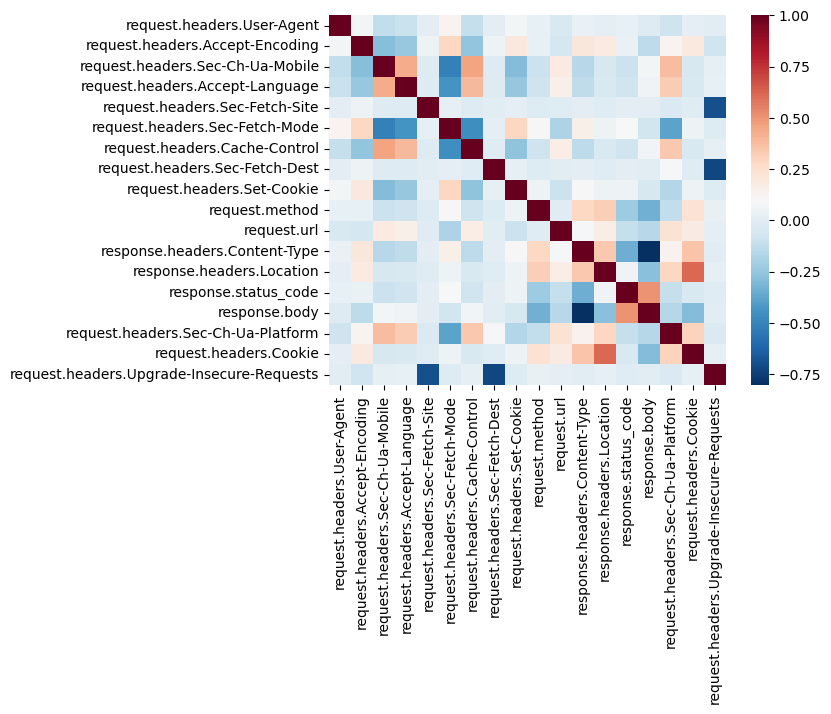

In [85]:
corr = df.corr()

# Create a heatmap of the correlations
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r')

In [87]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Sec-Ch-Ua-Mobile', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Cache-Control', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.headers.Content-Type', 'response.headers.Content-Length', 'response.headers.Location', 'response.status_code', 'response.body', 'request.headers.Sec-Ch-Ua-Platform', 'request.headers.Cookie', 'request.headers.Upgrade-Insecure-Requests']


request.headers.User-Agent                   float64
request.headers.Accept-Encoding              float64
request.headers.Sec-Ch-Ua-Mobile               int32
request.headers.Accept-Language                int32
request.headers.Sec-Fetch-Site               float64
request.headers.Sec-Fetch-Mode                 int32
request.headers.Cache-Control                  int32
request.headers.Sec-Fetch-Dest               float64
request.headers.Set-Cookie                   float64
request.method                                 int32
request.url                                  float64
response.headers.Content-Type                  int32
response.headers.Content-Length               object
response.headers.Location                    float64
response.status_code                           int64
response.body                                float64
request.headers.Sec-Ch-Ua-Platform             int32
request.headers.Cookie                       float64
request.headers.Upgrade-Insecure-Requests     

## Train test split

In [88]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(150508, 19) (150508,)
(32259, 19) (32259,)


Counter({'Malware': 39336, 'Benign': 143431})

## Model choosing and fitting

In [89]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('Benign', 118115), ('Malware', 32393)]


## Result printout

              precision    recall  f1-score   support

      Benign    0.98736   0.99964   0.99346     25316
     Malware    0.99864   0.95333   0.97546      6943

    accuracy                        0.98968     32259
   macro avg    0.99300   0.97649   0.98446     32259
weighted avg    0.98979   0.98968   0.98959     32259



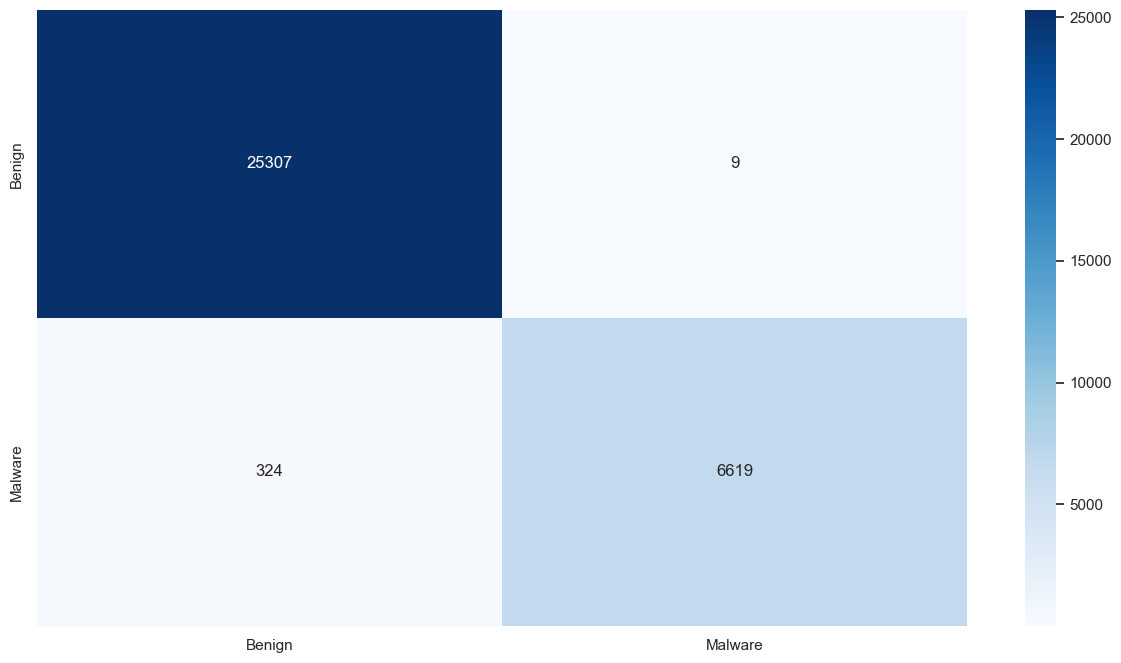

In [90]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

# Test

In [93]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
with open(f'./datasets/dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df = vectorize_df(test_df)

# Predict with your model
X = test_df[features_list].to_numpy()
predictions = clf.predict(X)

# Save your predictions

In [94]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')